In [ ]:
from google.colab import auth
auth.authenticate_user()
import pandas as pd
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_key('1Bqcoj9hNnCwAori_5Jo4IAOvHhKpS8FfW5BaVoTgikI')
!pip install --upgrade gspread

In [ ]:
list_s =['05TฺBangNa','59TPhayaThai','61TPhlabphla','52TBangYiRuea','54TDinDaeng','08TSongKhanong',
         '24TNaPhraLan','26TNaMueang','27TMahachai','30TThaPradu','32TThungSukhla','35TChangPhueak',
         '36TSiPhum','40TMaeMo','46TNaiMueang','44THatYai','75THuaiKon','76TMaePa','77TThaTum']
arr = [wb.worksheet(e).get_all_values() for e in list_s] 

arr[0]
for i in range(len(list_s)):  
  df = pd.DataFrame.from_records(arr[i][1:],columns = arr[i][0])
  print('\n'+list_s[i])
  print(df)

for k in range(len(list_s)):
  arr[k] = [[int(arr[k][i][e]) if arr[k][i][e]!='' else 0  for e in range(1,6)] for i in range(1,len(arr[k])) ]


05TฺBangNa
       2016 2017 2018 2019 2020
0        30   33   17   15   22
1        30   28   25   21   24
2        30   31   34   24   28
3        30   37   41   27   35
4        30   45   42   33   41
..  ..  ...  ...  ...  ...  ...
361      32   18   65   37   32
362      29   14   25   40   16
363      49   14   14   39   24
364      49   15   17   33   21
365      46                  17

[366 rows x 6 columns]

59TPhayaThai
       2016 2017 2018 2019 2020
0        17   21   21   23   20
1        22   19   26   23   24
2        28   19   38   24   27
3        42   21   39   28   34
4        35   29   51   35   38
..  ..  ...  ...  ...  ...  ...
361      20   21   60   33   28
362      17   15   18   36   18
363      31   22   19   35   25
364      29   18   14   36   25
365      27                  17

[366 rows x 6 columns]

61TPhlabphla
       2016 2017 2018 2019 2020
0        28   28   30   33   20
1        30   27   33   33   26
2        30   32   42   33   32
3        30   34

In [ ]:
print(arr[0])
import math
class Data:
    def getYearlyAvg(self,lists):
      li = []
      sum = [0] * 5
      for i in range(len(lists)):
        for j in range(len(lists[i])):
          sum[j] += lists[i][j]
      for i in range(0,5):
        if i == 0 or i == 4:
          li.append(sum[i]/366)
        else:
          li.append(sum[i]/365)
      return li

    def getMonthlyAvg(self,lists):
      li = [[] for e in range(5)] 
      for i in range(len(lists[0])):
        k = 0
        for j in range(len(lists)):
          k+=lists[j][i]
          if (j+1)%30 == 0 and j!= 0:
            li[i]+=[k/30]
            k = 0
        li[i] += [ k/6] if i==0 or i==4 else  [ k/5]
      return li

    def getWeeklyAvg(self,lists):
      li = [[] for e in range(5)] 
      for i in range(len(lists[0])):
        k = 0
        for j in range(len(lists)):
          k+=lists[j][i]
          if (j+1)%7 == 0 and j!= 0:
            li[i]+=[k/7]
            k = 0
        li[i] += [ k/2] if i==0 or i==4 else  [ k/1]
      return li
    
    def getCoSim(self,lists,n = 4):
      coSim = [0]*n
      size = [0]*(n+1)
      for i in range(0,365):
        size[0] += pow(lists[i][0],2)
      for i in range(0,n):
        for j in range(0,365):
          size[i+1] += pow(lists[j][i+1],2)
          coSim[i] += lists[j][i] * lists[j][i+1]
        coSim[i] /= (math.sqrt(size[i]) * math.sqrt(size[i+1]))
      return coSim

    def getNewCoSim(self,lists1,lists2):
      coSim = 0
      size1 = 0
      size2 = 0
      for i in range(len(lists1)):
        size1 += pow(lists1[i],2)
        size2 += pow(lists2[i],2)
        coSim += (lists1[i] * lists2[i])
      coSim /= (math.sqrt(size1) * math.sqrt(size2))
      return coSim

[[30, 33, 17, 15, 22], [30, 28, 25, 21, 24], [30, 31, 34, 24, 28], [30, 37, 41, 27, 35], [30, 45, 42, 33, 41], [30, 43, 46, 62, 49], [30, 46, 8, 65, 57], [30, 43, 8, 19, 64], [30, 35, 8, 22, 55], [30, 36, 10, 37, 100], [30, 25, 22, 62, 46], [30, 19, 26, 52, 37], [30, 29, 34, 63, 33], [30, 46, 41, 58, 36], [30, 62, 43, 48, 38], [30, 43, 58, 38, 41], [30, 36, 99, 45, 46], [30, 46, 50, 26, 58], [30, 42, 53, 39, 58], [30, 40, 42, 50, 60], [30, 37, 63, 57, 47], [30, 31, 66, 40, 36], [30, 38, 49, 41, 35], [30, 43, 44, 48, 21], [30, 55, 19, 60, 18], [30, 35, 9, 51, 12], [30, 38, 8, 40, 20], [30, 45, 7, 55, 26], [30, 58, 7, 65, 27], [30, 55, 8, 79, 37], [30, 52, 10, 58, 45], [30, 58, 23, 32, 60], [30, 49, 41, 29, 60], [30, 23, 27, 21, 54], [30, 43, 27, 20, 42], [30, 56, 27, 20, 29], [30, 70, 27, 12, 24], [30, 51, 27, 16, 29], [30, 37, 62, 14, 35], [30, 47, 27, 9, 42], [30, 50, 27, 13, 42], [30, 54, 27, 16, 48], [30, 45, 27, 24, 32], [30, 61, 56, 45, 11], [30, 71, 73, 19, 10], [30, 64, 57, 18, 

In [ ]:
dat = Data()
year = [0] * 19
month = [0] * 19
week = [0] * 19
coSim = [0] * 19
print('year')
for i in range(len(year)):
  year[i] = dat.getYearlyAvg(arr[i])
  #print(list_s[i],":",year[i])
print('month')
for i in range(len(month)):
  month[i] = dat.getMonthlyAvg(arr[i])
  #print(list_s[i],":",month[i])
print('week')
for i in range(len(week)):
  week[i] = dat.getWeeklyAvg(arr[i])
  #print(list_s[i],":",week[i])
for i in range(len(coSim)):
  coSim[i] = dat.getCoSim(arr[i])
  print(list_s[i],":",coSim[i])

year
month
week
05TฺBangNa : [0.8659148374997919, 0.8459597472918495, 0.8017950535176152, 0.8195470385288798]
59TPhayaThai : [0.8837576640587312, 0.8687774525110229, 0.8636002608092229, 0.8475178751031147]
61TPhlabphla : [0.8878535546903764, 0.874597223489994, 0.8470574651578077, 0.8745913771219516]
52TBangYiRuea : [0.8963728507399276, 0.8744040164461436, 0.8402641133254308, 0.8633483841838829]
54TDinDaeng : [0.9523700143864169, 0.9528500405625839, 0.9083413125966607, 0.9137038507876446]
08TSongKhanong : [0.8862858223539097, 0.8805453792056448, 0.8868995991781239, 0.8786757291517254]
24TNaPhraLan : [0.9105267046559222, 0.8996298358895106, 0.9069495968503904, 0.8851758500721157]
26TNaMueang : [0.8502054339396726, 0.8507140181391362, 0.851545236170309, 0.819572513233137]
27TMahachai : [0.8326556723209004, 0.827175116486378, 0.7735930668426112, 0.7776857399007754]
30TThaPradu : [0.8598780923165351, 0.831415468236152, 0.8661720527198922, 0.841524586730277]
32TThungSukhla : [0.8501441624914

05TฺBangNa
2016


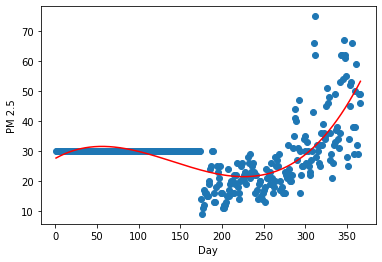

           3            2
4.118e-06 x - 0.001743 x + 0.1568 x + 27.5
2017


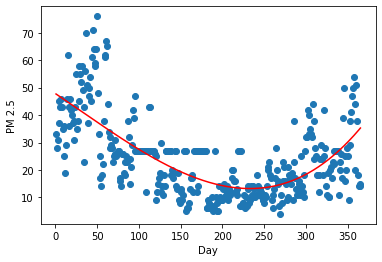

           3             2
1.707e-06 x - 0.0001559 x - 0.205 x + 47.88
2018


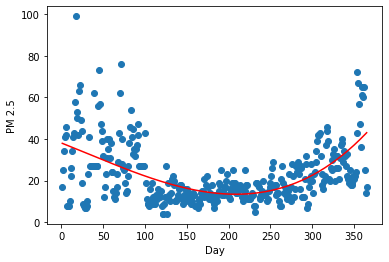

           3             2
1.759e-06 x - 0.0001676 x - 0.1596 x + 38.08
2019


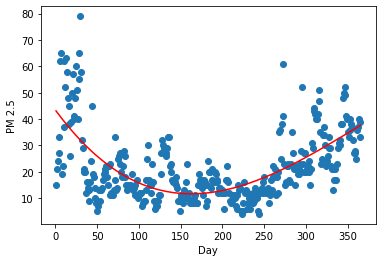

            3            2
-1.553e-06 x + 0.001708 x - 0.4327 x + 43.51
2020


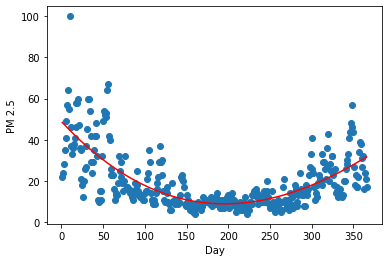

            3            2
-7.019e-07 x + 0.001319 x - 0.4354 x + 48.85
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 26, 

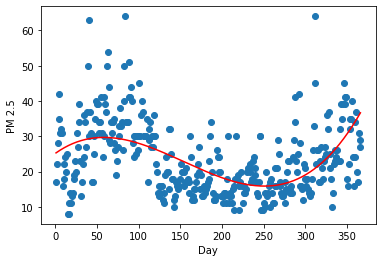

           3            2
3.866e-06 x - 0.001792 x + 0.1694 x + 25.12
2017


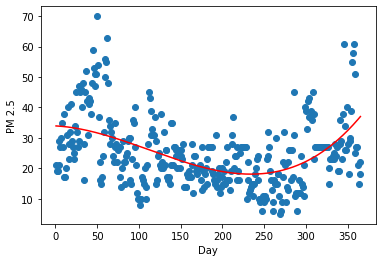

           3             2
2.228e-06 x - 0.0007525 x - 0.01368 x + 33.95
2018


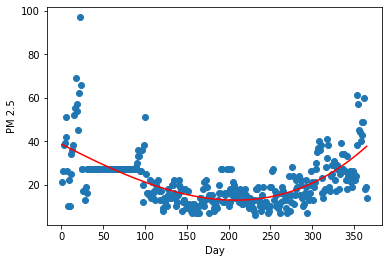

           3             2
1.131e-06 x + 0.0001246 x - 0.199 x + 38.62
2019


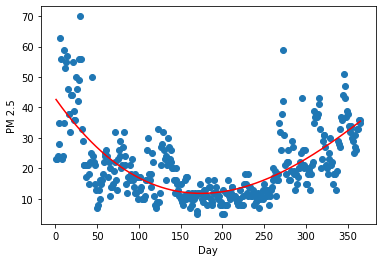

            3            2
-1.027e-06 x + 0.001387 x - 0.3898 x + 43.02
2020


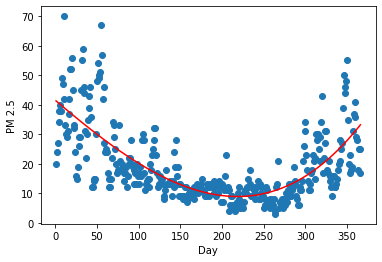

           3             2
1.189e-06 x + 0.0001634 x - 0.2419 x + 41.56
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 26, 

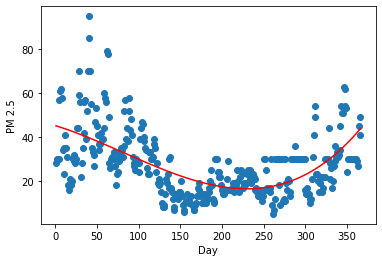

           3             2
2.539e-06 x - 0.0006221 x - 0.1164 x + 45.23
2017


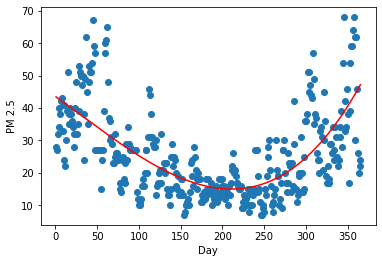

           3             2
1.951e-06 x - 0.0001797 x - 0.1847 x + 43.6
2018


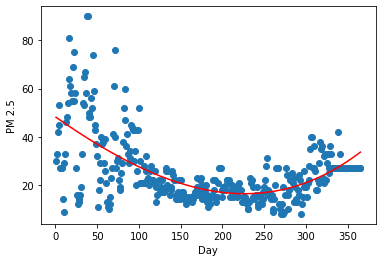

           3             2
7.608e-07 x + 0.0002777 x - 0.243 x + 48.33
2019


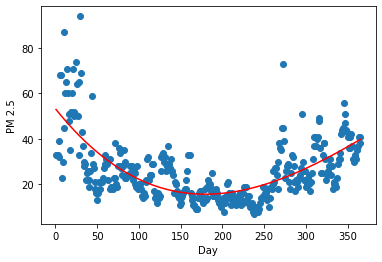

            3            2
-1.288e-06 x + 0.001634 x - 0.462 x + 53.42
2020


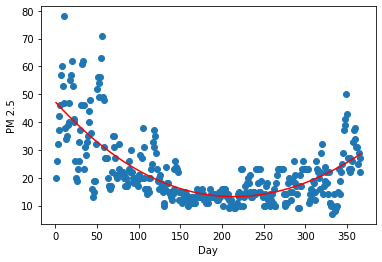

            3             2
-2.279e-07 x + 0.0008419 x - 0.3291 x + 47.3
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 26,

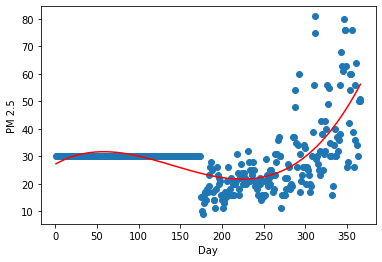

           3            2
4.386e-06 x - 0.001856 x + 0.1714 x + 27.1
2017


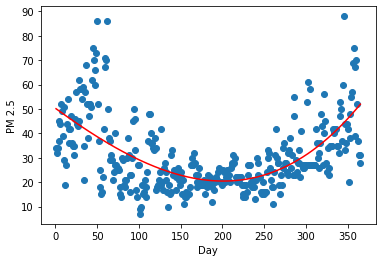

           3             2
1.186e-06 x + 0.0002625 x - 0.2494 x + 50.35
2018


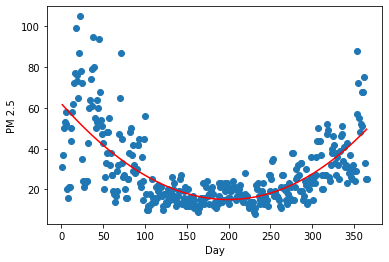

           3            2
2.072e-07 x + 0.001099 x - 0.4631 x + 62.06
2019


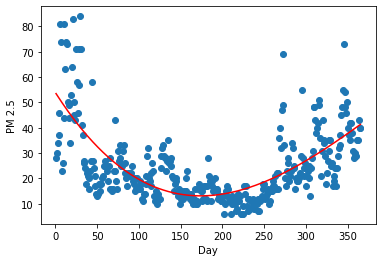

            3            2
-1.575e-06 x + 0.001897 x - 0.5171 x + 53.99
2020


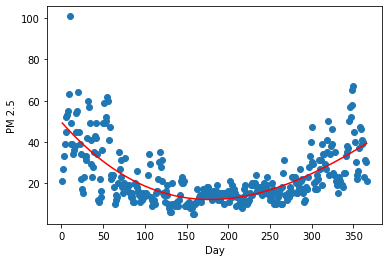

           3            2
-1.12e-06 x + 0.001583 x - 0.4574 x + 49.58
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 26, 21

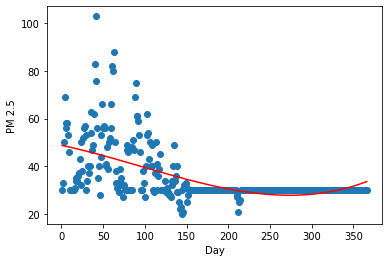

           3             2
1.064e-06 x - 0.0003016 x - 0.0738 x + 48.81
2017


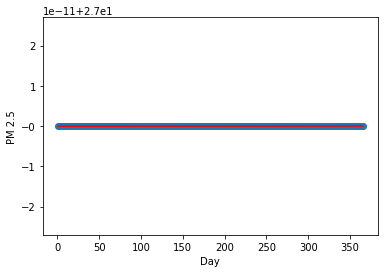

            3             2
-1.104e-21 x + 9.705e-19 x - 8.226e-17 x + 27
2018


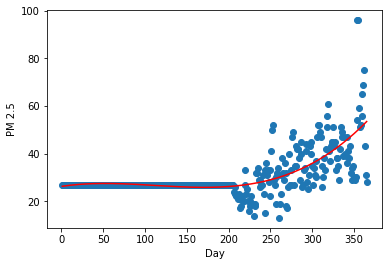

           3             2
1.967e-06 x - 0.0006575 x + 0.05255 x + 26.24
2019


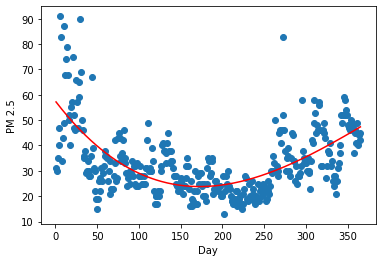

            3            2
-1.358e-06 x + 0.001602 x - 0.4321 x + 57.61
2020


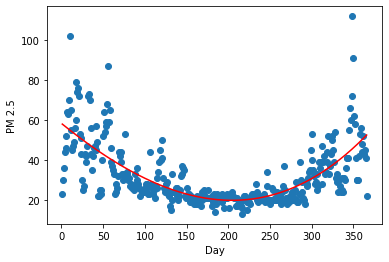

           3             2
9.116e-07 x + 0.0005477 x - 0.3384 x + 58.32
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 26, 

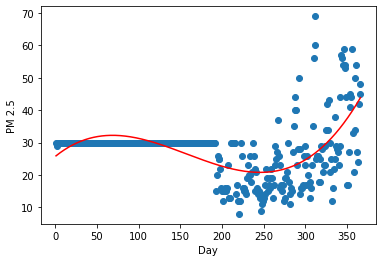

          3            2
4.13e-06 x - 0.001949 x + 0.2095 x + 25.71
2017


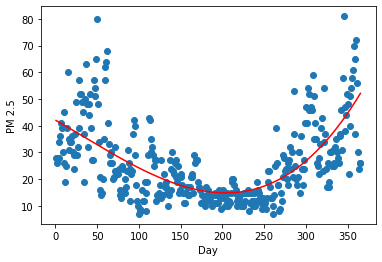

          3            2
2.12e-06 x - 0.000206 x - 0.18 x + 42.17
2018


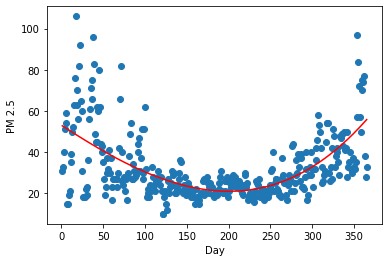

           3             2
1.333e-06 x + 0.0002647 x - 0.2666 x + 53.07
2019


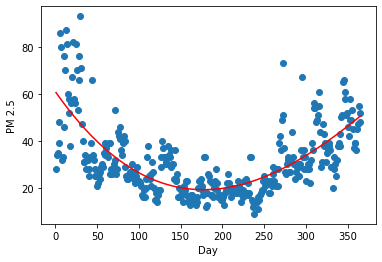

            3            2
-1.206e-06 x + 0.001756 x - 0.509 x + 61.06
2020


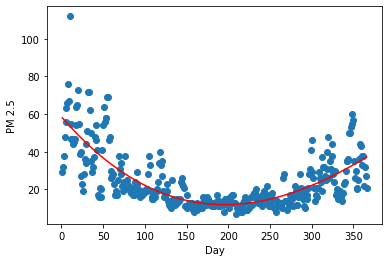

            3            2
-9.577e-07 x + 0.001595 x - 0.514 x + 58.59
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 26, 2

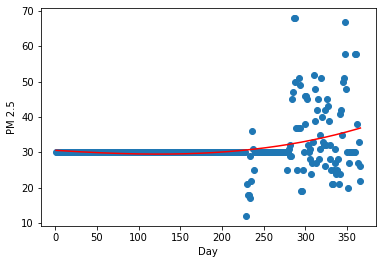

           3             2
1.504e-07 x + 3.355e-05 x - 0.01518 x + 30.59
2017


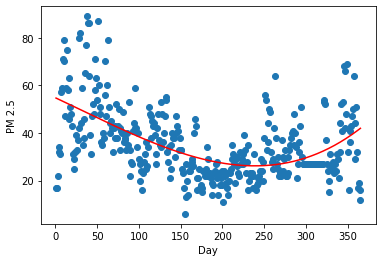

           3             2
1.329e-06 x - 0.0001317 x - 0.1642 x + 54.81
2018


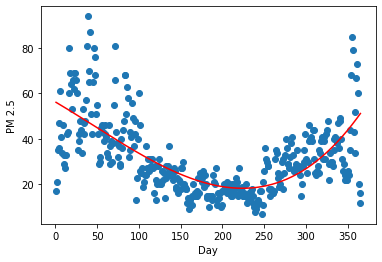

           3             2
2.454e-06 x - 0.0003409 x - 0.2166 x + 56.33
2019


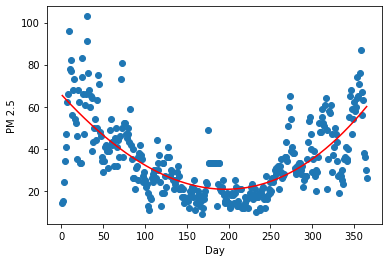

           3             2
6.109e-07 x + 0.0009239 x - 0.4341 x + 65.72
2020


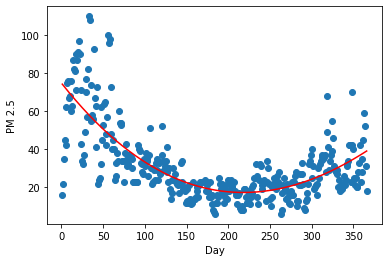

            3            2
-5.878e-07 x + 0.001467 x - 0.5559 x + 74.83
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 26, 

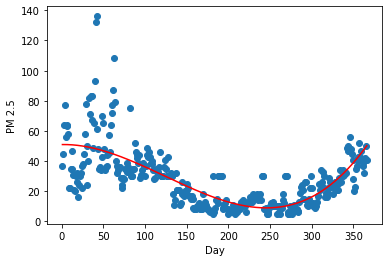

           3            2
5.875e-06 x - 0.002191 x + 0.01291 x + 50.95
2017


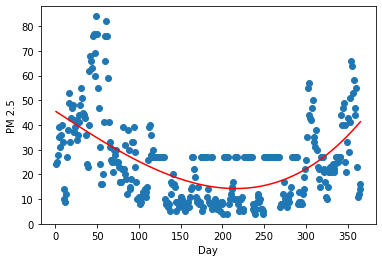

           3             2
1.474e-06 x + 3.905e-05 x - 0.2225 x + 45.65
2018


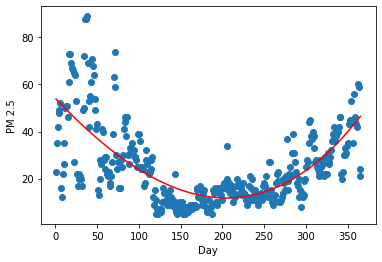

           3             2
9.318e-07 x + 0.0006295 x - 0.3752 x + 54.21
2019


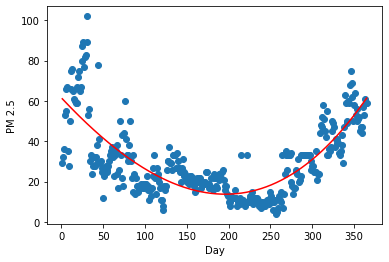

           3             2
1.169e-06 x + 0.0007839 x - 0.4421 x + 61.52
2020


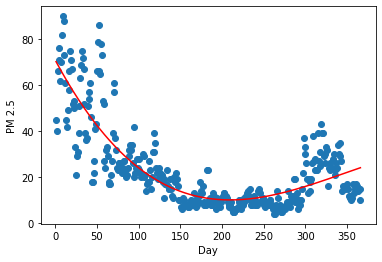

            3            2
-2.216e-06 x + 0.002313 x - 0.6777 x + 70.92
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 26, 

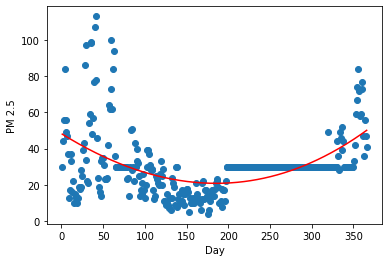

           3             2
2.699e-07 x + 0.0006969 x - 0.2862 x + 48.27
2017


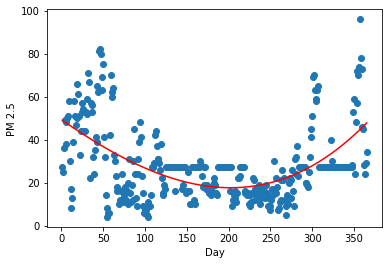

           3             2
9.962e-07 x + 0.0003719 x - 0.2727 x + 49.28
2018


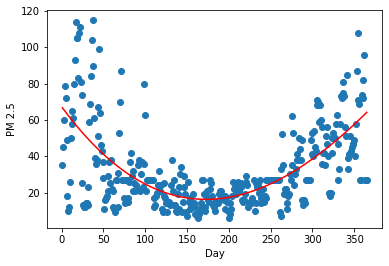

            3            2
-1.153e-06 x + 0.002114 x - 0.6267 x + 67.34
2019


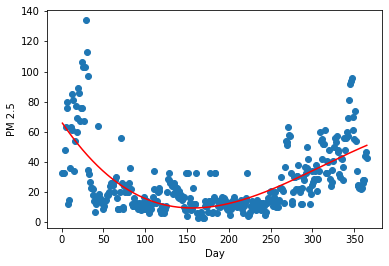

            3            2
-3.754e-06 x + 0.003501 x - 0.8203 x + 66.6
2020


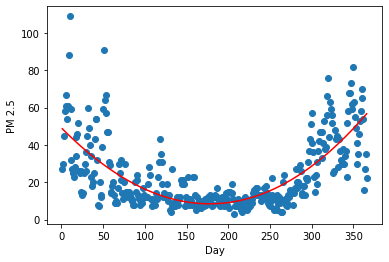

           3            2
1.981e-07 x + 0.001219 x - 0.452 x + 49.12
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 26, 21,

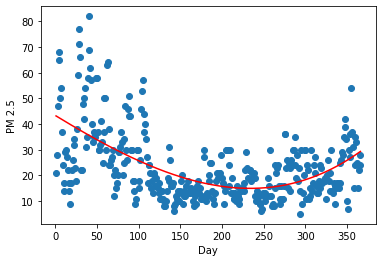

           3             2
8.276e-07 x + 0.0001329 x - 0.1979 x + 43.37
2017


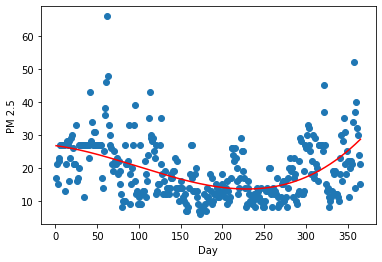

           3             2
1.548e-06 x - 0.0004577 x - 0.03391 x + 26.74
2018


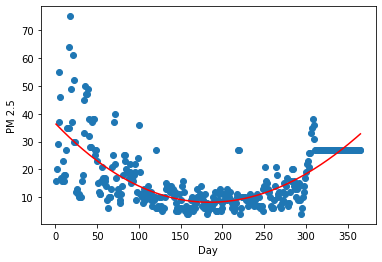

            3            2
-2.053e-07 x + 0.000907 x - 0.3142 x + 36.57
2019


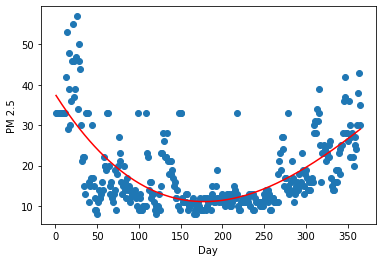

            3            2
-8.905e-07 x + 0.001157 x - 0.3273 x + 37.69
2020


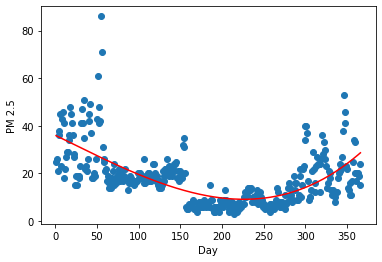

           3             2
1.297e-06 x - 6.164e-05 x - 0.1713 x + 36.03
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 26, 

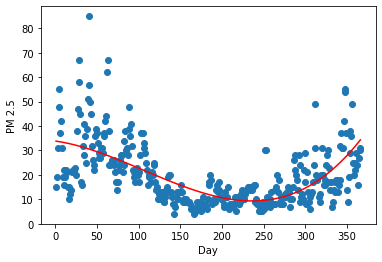

           3             2
2.855e-06 x - 0.0009086 x - 0.04865 x + 33.87
2017


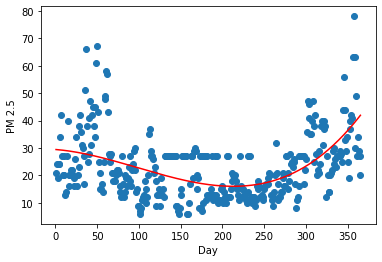

           3             2
2.256e-06 x - 0.0006651 x - 0.02365 x + 29.47
2018


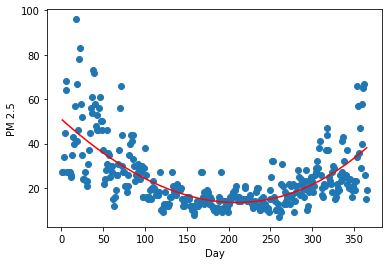

           3             2
4.517e-07 x + 0.0006648 x - 0.338 x + 50.97
2019


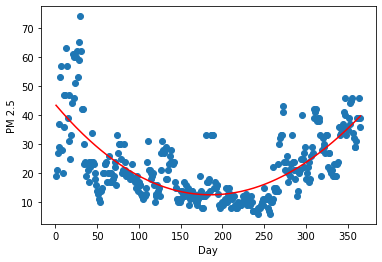

            3             2
-1.643e-07 x + 0.0009642 x - 0.341 x + 43.71
2020


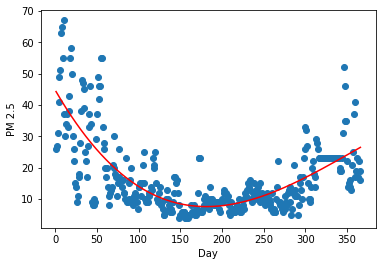

            3            2
-1.571e-06 x + 0.001698 x - 0.461 x + 44.73
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 26, 2

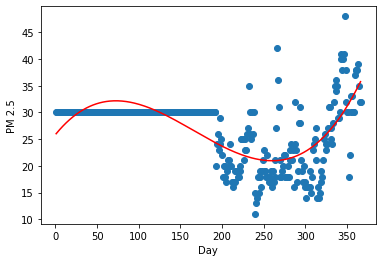

           3            2
3.406e-06 x - 0.001699 x + 0.1929 x + 25.82
2017


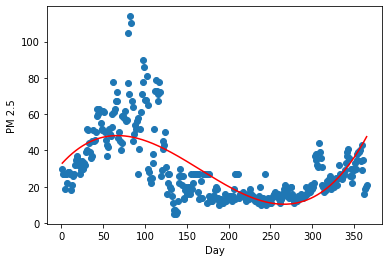

           3            2
9.581e-06 x - 0.004787 x + 0.512 x + 32.5
2018


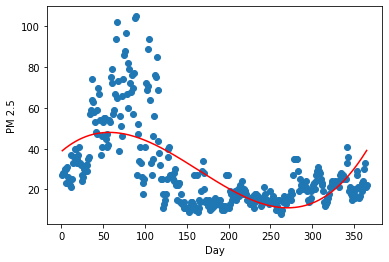

           3            2
7.606e-06 x - 0.003738 x + 0.3522 x + 38.67
2019


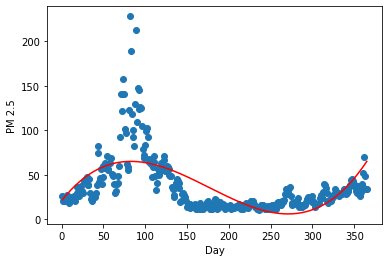

           3            2
1.771e-05 x - 0.009394 x + 1.191 x + 20.74
2020


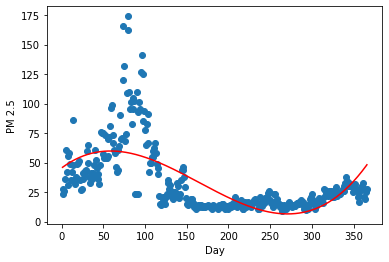

           3            2
1.112e-05 x - 0.005494 x + 0.5282 x + 45.49
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 26, 21

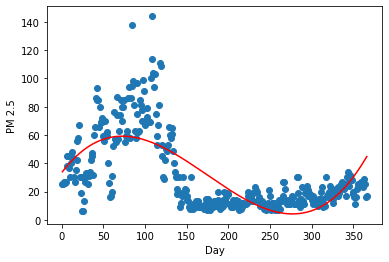

           3            2
1.293e-05 x - 0.006781 x + 0.7813 x + 33.23
2017


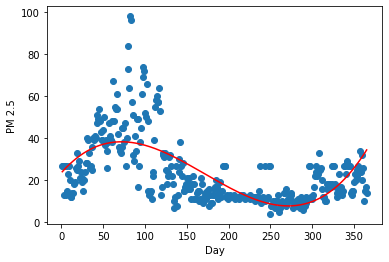

          3            2
7.69e-06 x - 0.003955 x + 0.4486 x + 23.63
2018


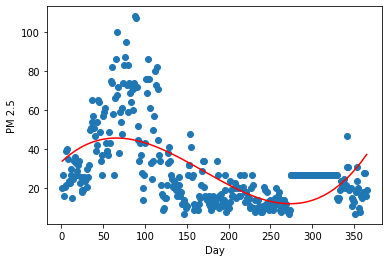

           3            2
7.469e-06 x - 0.003801 x + 0.4027 x + 33.6
2019


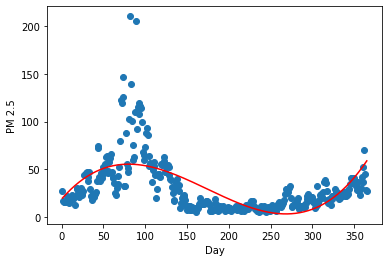

           3            2
1.564e-05 x - 0.008178 x + 1.01 x + 18.95
2020


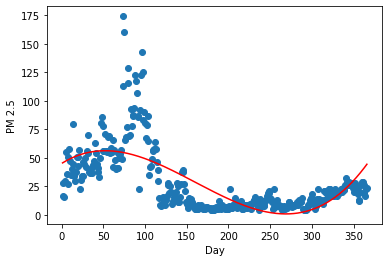

           3            2
1.088e-05 x - 0.005233 x + 0.4564 x + 45.19
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 26, 21

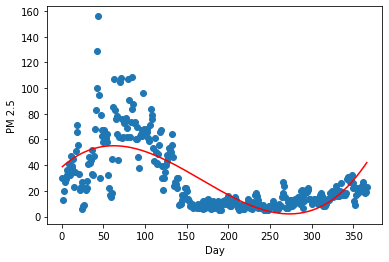

           3            2
1.136e-05 x - 0.005721 x + 0.5822 x + 38.31
2017


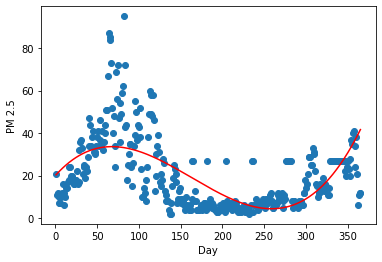

           3            2
8.401e-06 x - 0.004116 x + 0.4425 x + 19.96
2018


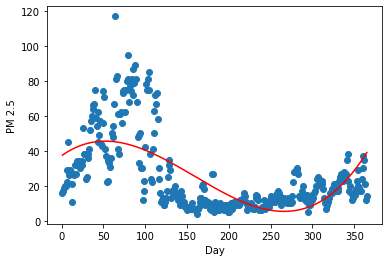

         3            2
8.2e-06 x - 0.003915 x + 0.3416 x + 37.26
2019


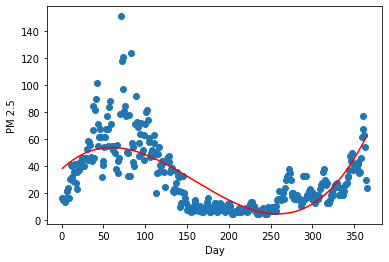

           3            2
1.255e-05 x - 0.005988 x + 0.5818 x + 37.92
2020


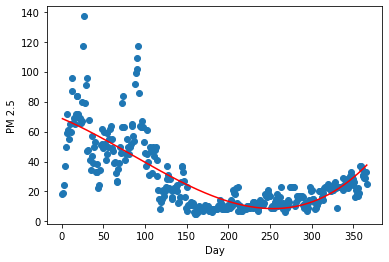

           3             2
3.728e-06 x - 0.0009535 x - 0.2357 x + 68.84
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 26, 

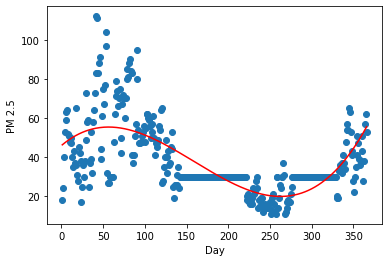

           3            2
8.086e-06 x - 0.003871 x + 0.3599 x + 45.95
2017


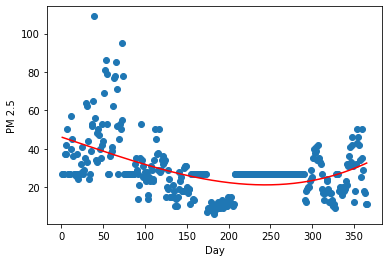

           3             2
9.655e-07 x - 5.098e-05 x - 0.1471 x + 46.03
2018


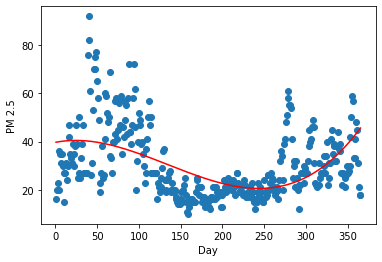

           3            2
3.784e-06 x - 0.001523 x + 0.06798 x + 39.68
2019


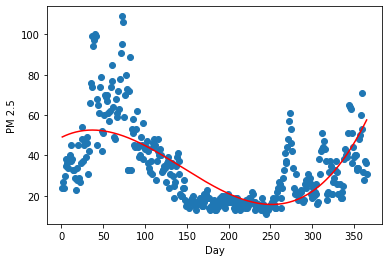

           3            2
7.462e-06 x - 0.003227 x + 0.2072 x + 48.95
2020


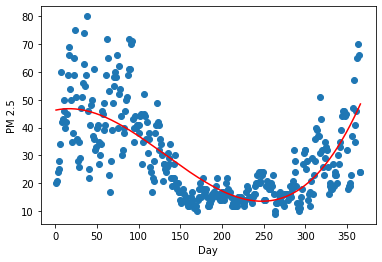

           3            2
5.388e-06 x - 0.002139 x + 0.06742 x + 46.24
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 26, 2

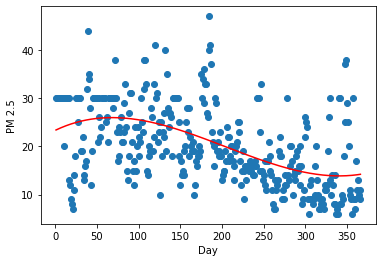

           3            2
1.196e-06 x - 0.000733 x + 0.08323 x + 23.33
2017


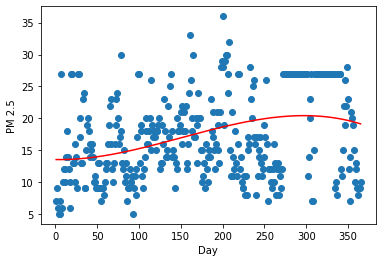

            3             2
-5.526e-07 x + 0.0002505 x - 0.002484 x + 13.53
2018


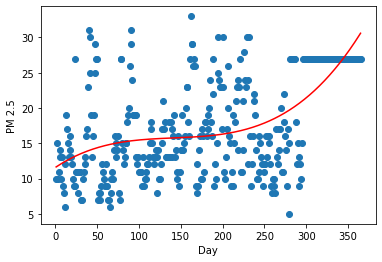

          3             2
1.23e-06 x - 0.0005223 x + 0.07887 x + 11.58
2019


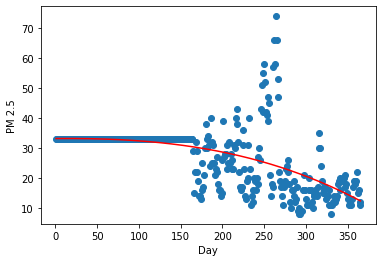

            3             2
-2.276e-07 x - 8.052e-05 x + 0.002678 x + 33.16
2020


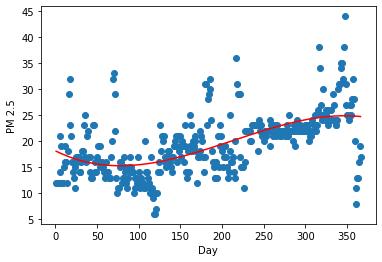

            3             2
-9.858e-07 x + 0.0006279 x - 0.07975 x + 18.13
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 2

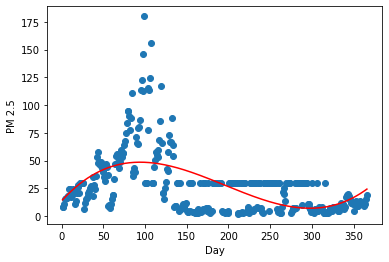

           3            2
9.834e-06 x - 0.005775 x + 0.8251 x + 13.89
2017


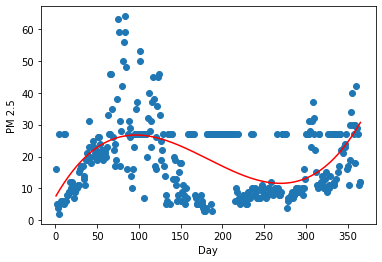

           3            2
5.881e-06 x - 0.003228 x + 0.4592 x + 7.207
2018


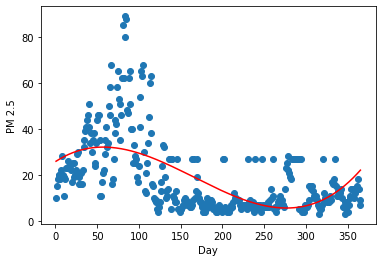

          3            2
5.04e-06 x - 0.002523 x + 0.2397 x + 25.68
2019


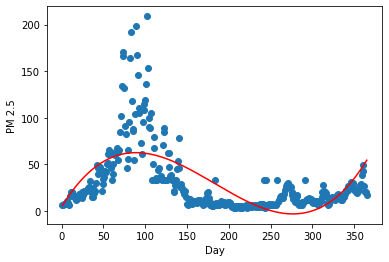

           3          2
1.989e-05 x - 0.0109 x + 1.466 x + 4.5
2020


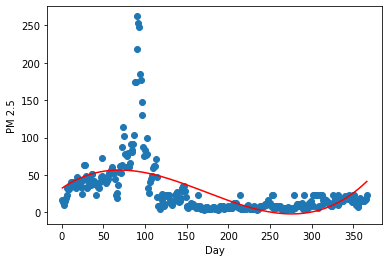

           3            2
1.336e-05 x - 0.006925 x + 0.7702 x + 32.02
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 26, 21

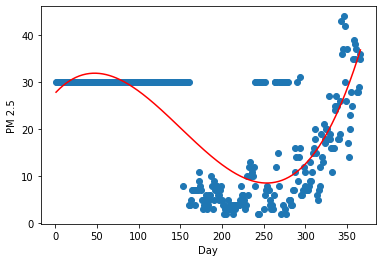

           3            2
5.308e-06 x - 0.002396 x + 0.1908 x + 27.67
2017


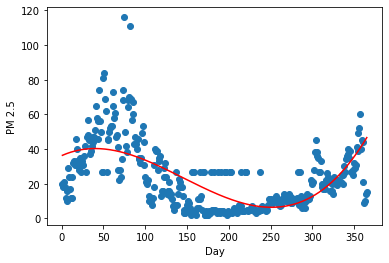

           3            2
7.204e-06 x - 0.003146 x + 0.2174 x + 36.15
2018


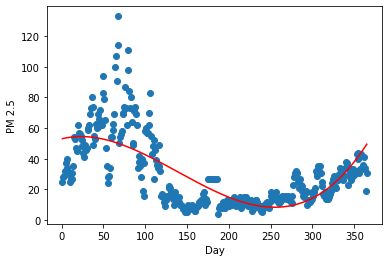

           3            2
7.425e-06 x - 0.003099 x + 0.1325 x + 52.99
2019


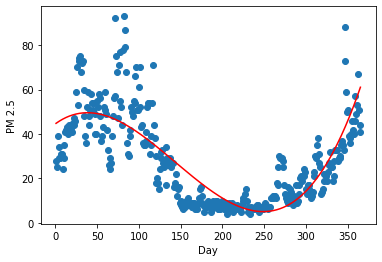

           3            2
9.597e-06 x - 0.004136 x + 0.2763 x + 44.51
2020


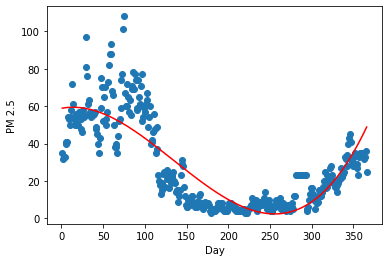

           3            2
8.065e-06 x - 0.003262 x + 0.08633 x + 58.81
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 26, 2

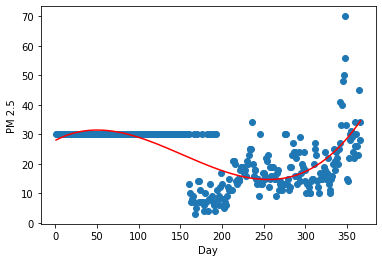

           3            2
3.891e-06 x - 0.001785 x + 0.1502 x + 27.9
2017


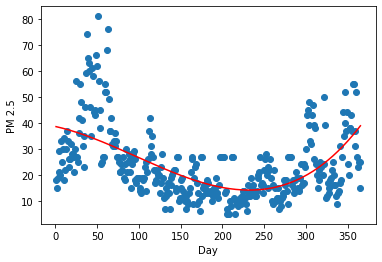

           3             2
2.594e-06 x - 0.0007503 x - 0.07104 x + 38.63
2018


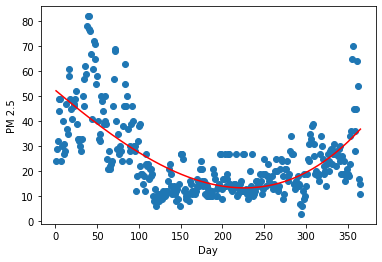

           3             2
1.251e-06 x + 0.0001972 x - 0.2814 x + 52.49
2019


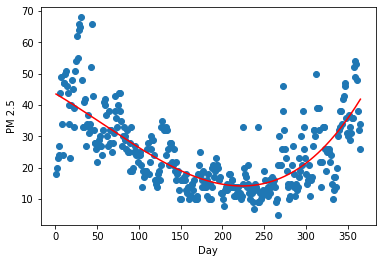

           3             2
2.153e-06 x - 0.0003703 x - 0.1566 x + 43.68
2020


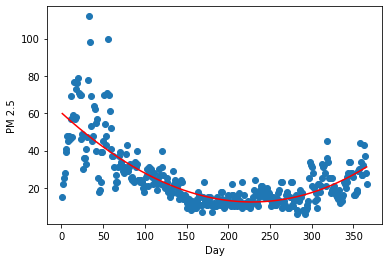

          3             2
2.17e-07 x + 0.0008167 x - 0.4072 x + 60.22
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 14, 9, 11, 12, 17, 16, 16, 15, 15, 19, 20, 24, 25, 30, 30, 13, 16, 13, 18, 25, 23, 19, 21, 25, 16, 16, 11, 11, 12, 12, 13, 15, 24, 17, 15, 19, 20, 16, 20, 16, 22, 19, 22, 26, 18, 16, 14, 20, 25, 26, 21, 22, 20, 23, 19, 22, 28, 26, 21

In [ ]:
import matplotlib.pyplot as plt
import numpy

class Graph:
  def __init__(self,arr):
    self.x = []
    self.y = []
    self.arr = arr

  def getShort5Y(self):
    temp = []
    for i in range(len(self.arr[0])):
      for j in range(len(self.arr)):
        if self.arr[j][i] != 0:
          temp.append(self.arr[j][i])
      self.y.append(temp)
      temp = []
    return self.y

  def getShort5X(self):
    self.x = []
    temp = []
    for i in range(0,5):
      if i == 0 or i == 4:
        for j in range(1,367):
          temp.append(j)
      else:
        for j in range(1,366):
          temp.append(j)
      self.x.append(temp)
      temp = []

    return self.x

  def getLongX(self):
    temp = []
    for i in range(1,1828):
      temp.append(i)
    return temp
  
  def getLongY(self):
    temp = []
    for i in range(len(self.arr[0])):
      for j in range(len(self.arr)):
        if self.arr[j][i] != 0:
          temp.append(self.arr[j][i])
    return temp

g = []
xG = []
yG = []
theta = []
linearData = []
for ii in range(0,19):
  print(list_s[ii])
  g.append(Graph(arr[ii]))
  xG.append(g[ii].getShort5X())
  yG.append(g[ii].getShort5Y())
  temptheta = [[],[],[],[]]
  templinearData = []
  for i in range(0,5):
    temp = 2016+i
    print(temp)
    model = numpy.poly1d(numpy.polyfit(xG[ii][i],yG[ii][i],3))
    line = numpy.linspace(1,len(xG[ii][i]),len(xG[ii][i]))
    plt.scatter(xG[ii][i],yG[ii][i])
    plt.plot(line , model(line), "r-")
    plt.xlabel('Day')
    plt.ylabel('PM 2.5')
    plt.show()
    print(model)
    templinearData.append(model(line))
    for i in range(0,4):
      temptheta[i].append(model[i])
  linearData.append(templinearData)
  theta.append(temptheta)
  #print(theta)
  #print(list_s[ii],":",coSim[ii])
  print(yG[0][0])
  #print(yG)

05TฺBangNa
[0.9740591617807096, 0.9313744632332275, 0.9006636298491313, 0.9202085310846456, 0.9191115261895483]


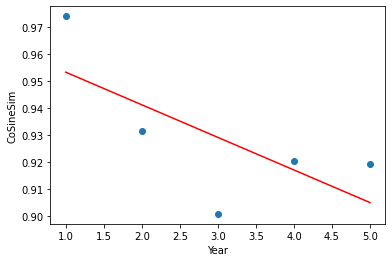

59TPhayaThai
[0.9422578712699318, 0.9347144427861755, 0.9347459118971456, 0.9365121282669432, 0.9292400673019635]


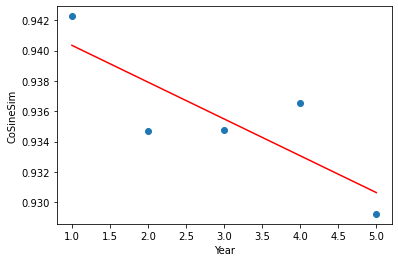

61TPhlabphla
[0.9286171289300906, 0.9406371096789462, 0.9289976254452347, 0.9407657516530548, 0.9431685507783877]


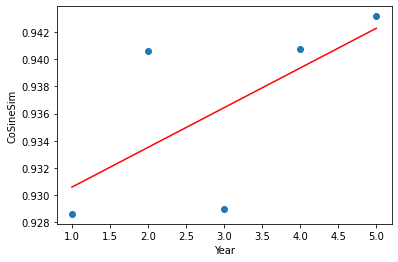

52TBangYiRuea
[0.9648595305303113, 0.9432481700410928, 0.9243547599949969, 0.9292256347304023, 0.9335912457478072]


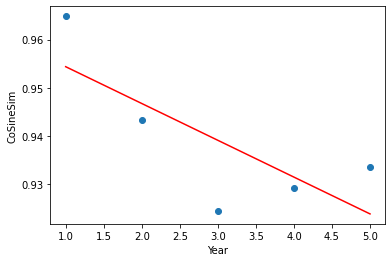

54TDinDaeng
[0.9693605577956834, 1.0, 0.9766511261210704, 0.9591495856329455, 0.9545027382420773]


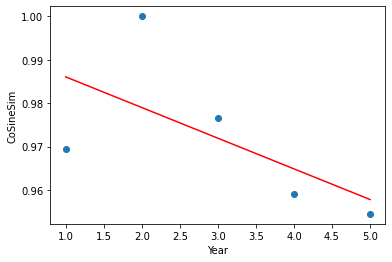

08TSongKhanong
[0.968439896352925, 0.9314097855827583, 0.9374688196058967, 0.9541540356166419, 0.9389244644868715]


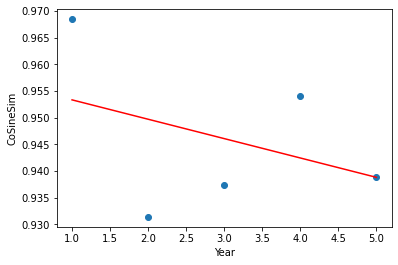

24TNaPhraLan
[0.9818428254306976, 0.945710323222658, 0.9428089040800995, 0.9475953695022984, 0.9385907939831545]


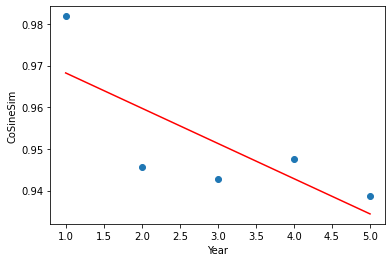

26TNaMueang
[0.9193671295934012, 0.8934079917419302, 0.9229650049042163, 0.9464113219502505, 0.9402809272990121]


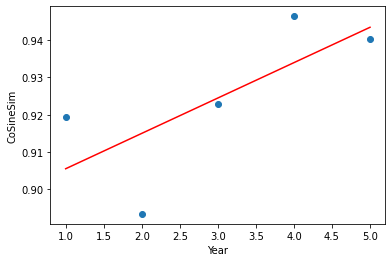

27TMahachai
[0.9040303593429065, 0.9059801265078571, 0.900985507695999, 0.8824027290050697, 0.9078611815515432]


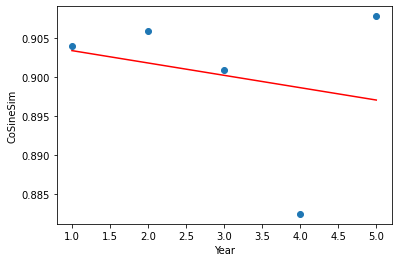

30TThaPradu
[0.9126727871290079, 0.9345750965741246, 0.923739089756084, 0.9448844055157134, 0.9125833938922522]


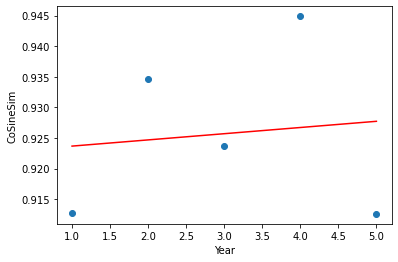

32TThungSukhla
[0.912362511681995, 0.924846631150246, 0.9308305808638764, 0.9385946142199927, 0.9231947808548422]


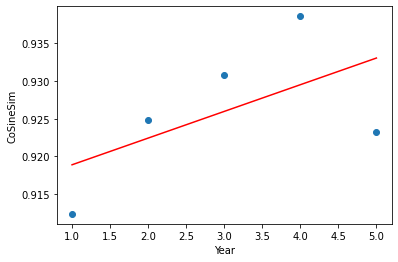

35TChangPhueak
[0.988361857642738, 0.9238642835085187, 0.9057304265841634, 0.8637792847578641, 0.8808789941856949]


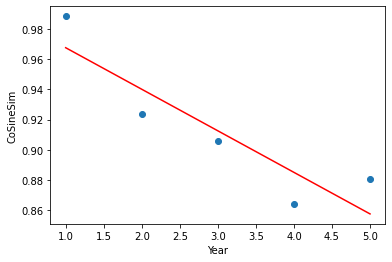

36TSiPhum
[0.8958041964582268, 0.9123224021074406, 0.8934085000403142, 0.8528467389953691, 0.8647199267862855]


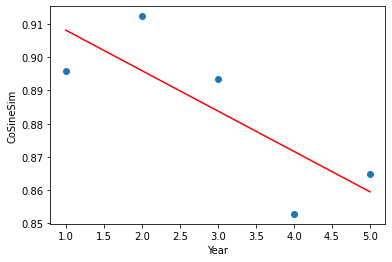

40TMaeMo
[0.8905157356911102, 0.8690822143361453, 0.8794941273751287, 0.9119417644281114, 0.9203191205244866]


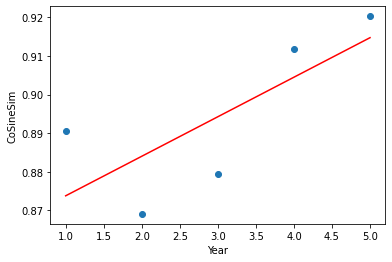

46TNaiMueang
[0.9513582507474454, 0.9194738239856522, 0.9293900620923222, 0.9315455033055954, 0.9486481049902675]


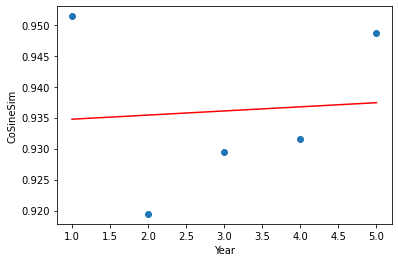

44THatYai
[0.9473434359940301, 0.9391806380624536, 0.9544261477477174, 0.9581337670550515, 0.9728295039294248]


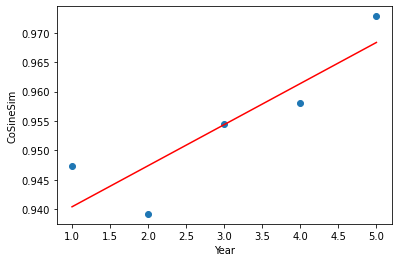

75THuaiKon
[0.8109747277352771, 0.8934895958023841, 0.8494370819642144, 0.8136730401666586, 0.7591968493615482]


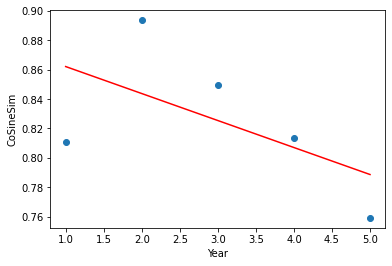

76TMaePa
[0.9465195491767392, 0.8859566781940263, 0.9096121002177744, 0.9412869085637331, 0.939378019842645]


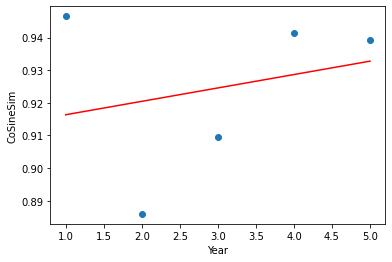

77TThaTum
[0.9626060890840502, 0.9179981142184109, 0.9258515387854496, 0.9551454387403763, 0.9358866612168347]


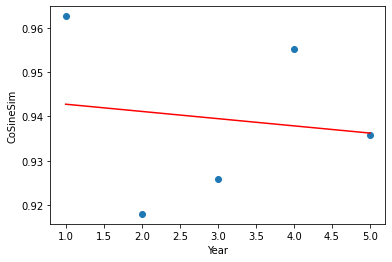

[0.8927651014281812, 0.9282227075678813, 0.9452066789983535, 0.9160881367462124, 0.9507629855160755, 0.9351934162195519, 0.9259239382591482, 0.9529357527836249, 0.8954772548950208, 0.92873011131386, 0.9365895801788231, 0.8300077516363737, 0.8473270921407411, 0.9250104883986121, 0.9380785653659326, 0.9753602780167515, 0.7703425652910614, 0.9368648027094395, 0.9346101090452847]


In [ ]:
newCoSim = []
xCoSim = [1,2,3,4,5]
#print(linearData[0][0].tolist()[0])
#print(type(yG[0][0][0]))
for i in range(0,19):
  print(list_s[i])
  temp = []
  for j in range(0,5):
    tl = linearData[i][j].tolist()
    temp.append(dat.getNewCoSim(yG[i][j],tl))
  print(temp)
  model = numpy.poly1d(numpy.polyfit(xCoSim,temp,1))
  line = numpy.linspace(1,len(xCoSim),50)
  plt.scatter(xCoSim,temp)
  plt.plot(line , model(line), "r-")
  plt.xlabel('Year')
  plt.ylabel('CoSineSim')
  plt.show()
  newCoSim.append(model(6))
print(newCoSim)


05TฺBangNa


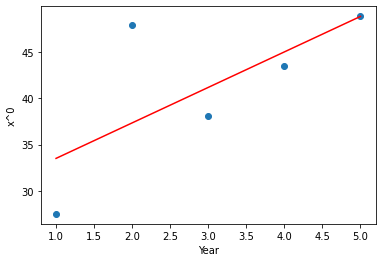

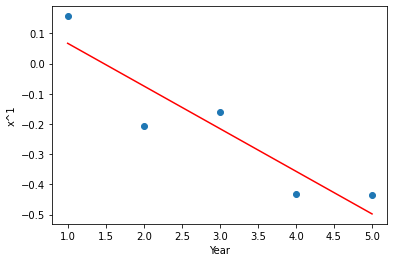

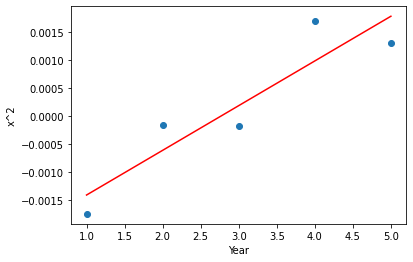

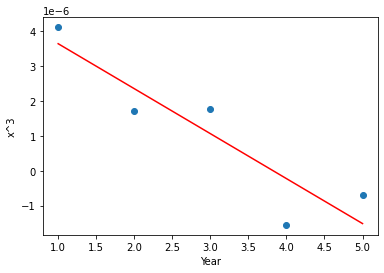

[52.66463905630998, -0.6388257447760448, 0.002588262315396605, -2.8038813281498177e-06]
59TPhayaThai


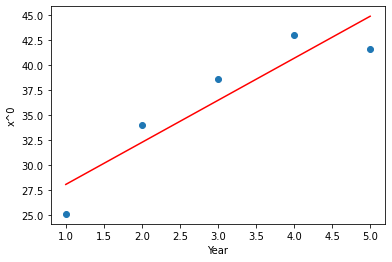

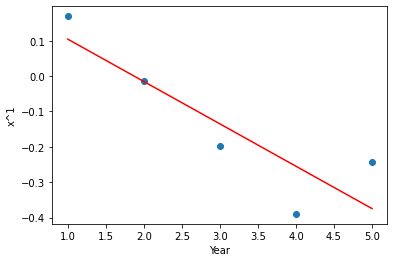

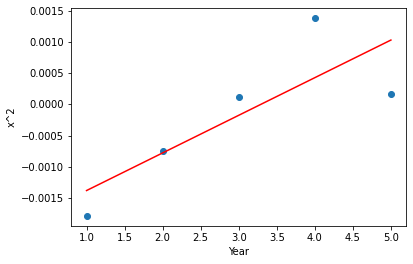

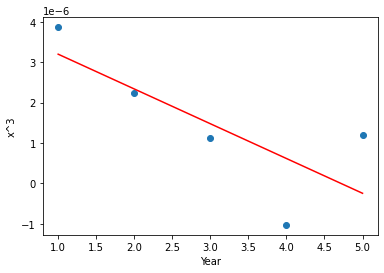

[49.036513265095635, -0.49466919668451464, 0.001640936897172214, -1.1051326541757906e-06]
61TPhlabphla


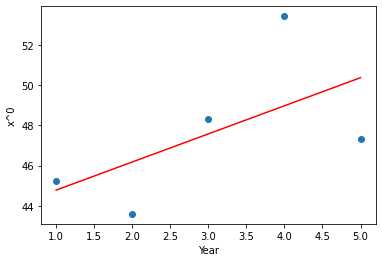

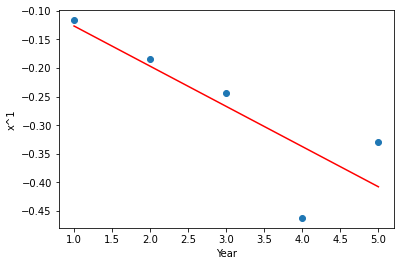

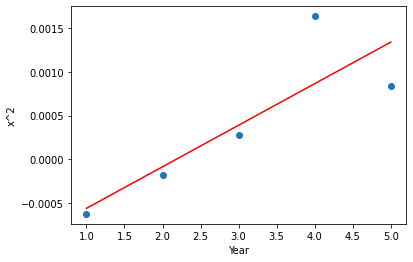

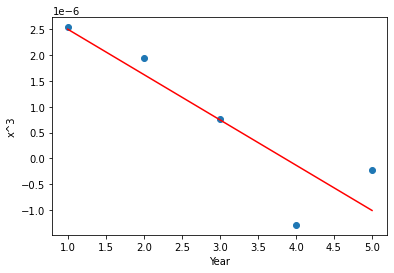

[51.7675739222603, -0.4778372447573279, 0.0018125967356115377, -1.8847144353858319e-06]
52TBangYiRuea


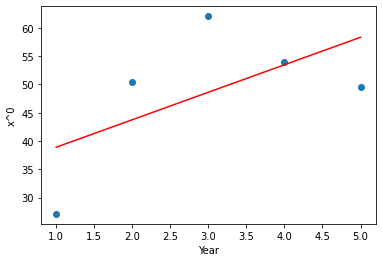

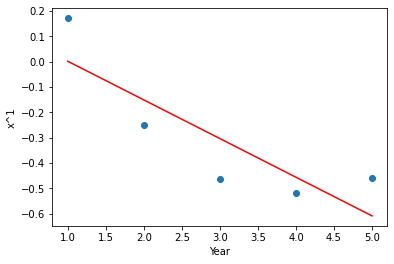

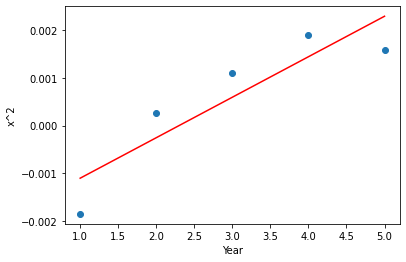

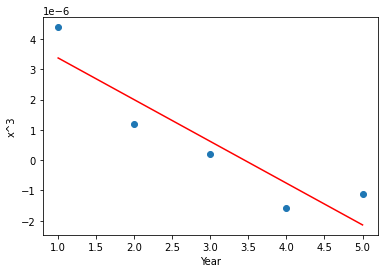

[63.19518998576784, -0.7607150439269276, 0.0031504106203501456, -3.5150828306157517e-06]
54TDinDaeng


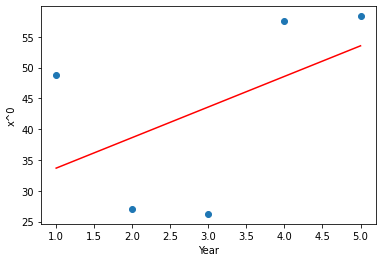

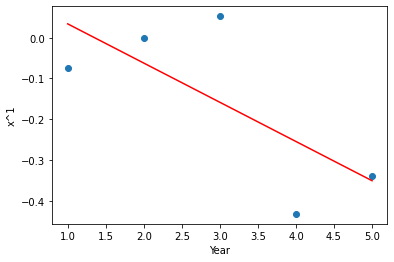

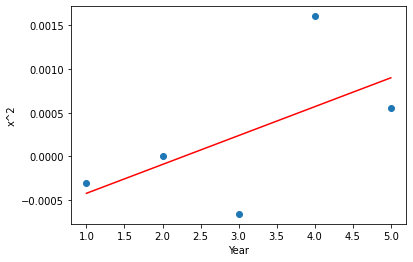

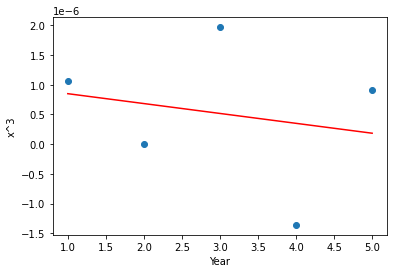

[58.488170805427465, -0.4467488223483631, 0.0012284251193290523, 1.811548926782679e-08]
08TSongKhanong


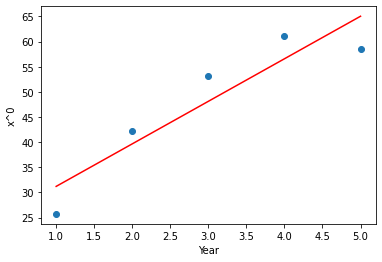

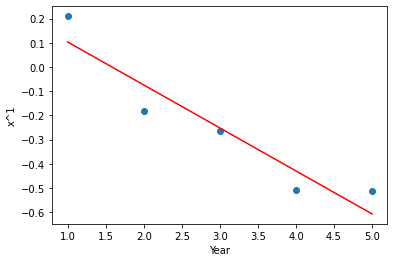

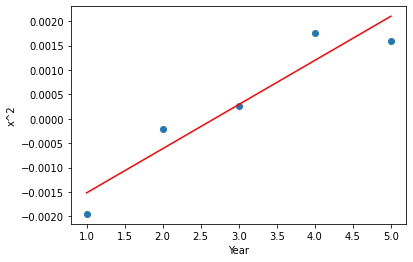

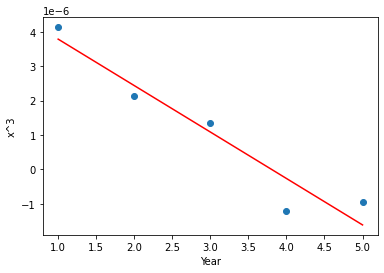

[73.51069025105267, -0.7848071062729847, 0.003007232447491989, -2.9663776314822243e-06]
24TNaPhraLan


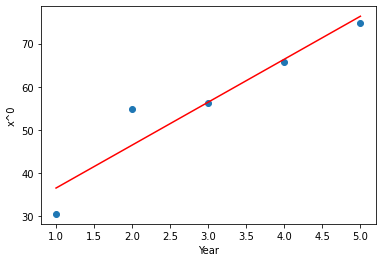

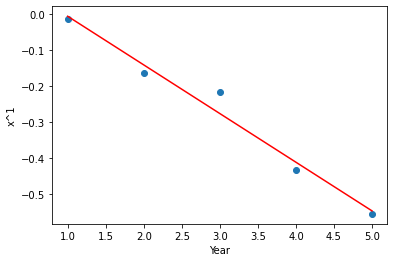

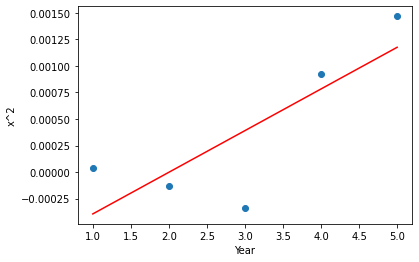

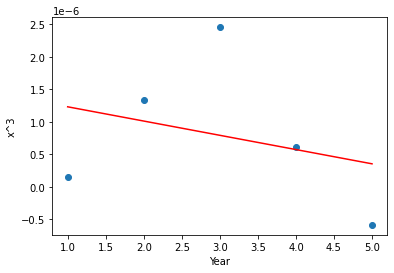

[86.2714732931336, -0.6826212356610589, 0.0015672719154318122, 1.331400722796538e-07]
26TNaMueang


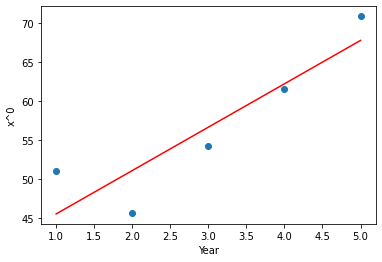

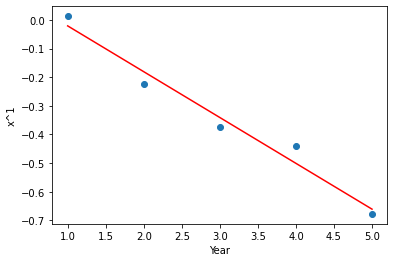

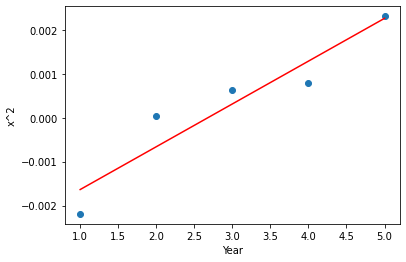

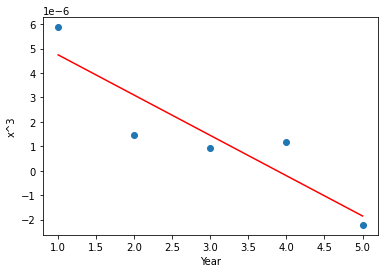

[73.39181760461943, -0.8211639038051993, 0.0032407432012257075, -3.4990285749573357e-06]
27TMahachai


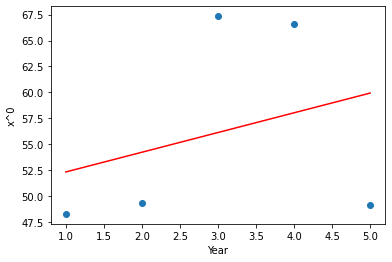

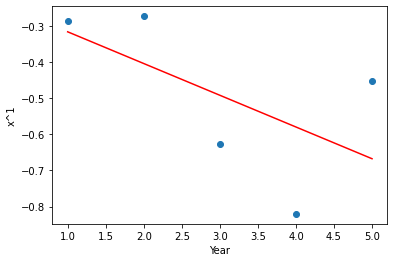

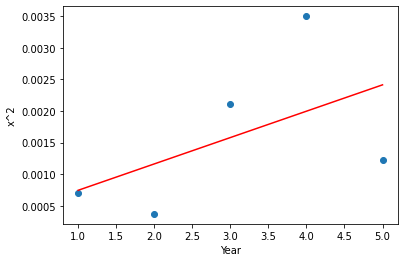

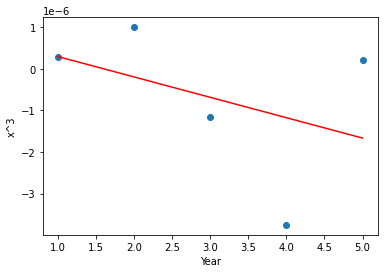

[61.83072852066215, -0.7553100748268237, 0.0028328007174773227, -2.156744442923302e-06]
30TThaPradu


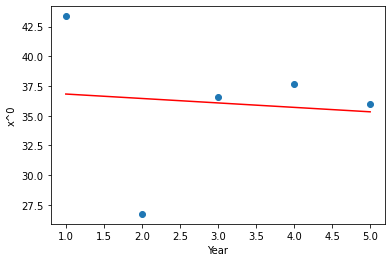

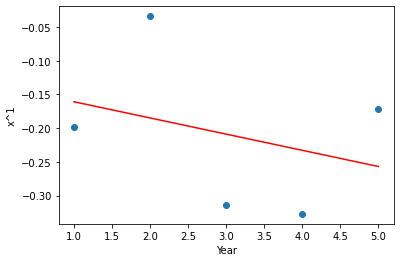

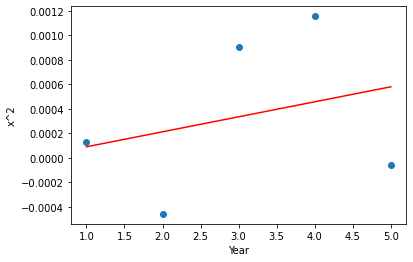

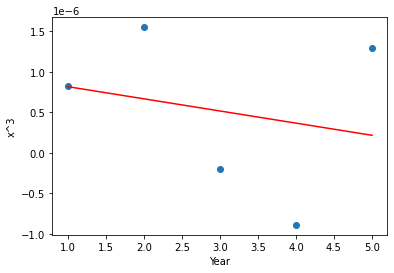

[34.956067006551244, -0.2809571878949822, 0.0007030939409509421, 6.50715657292815e-08]
32TThungSukhla


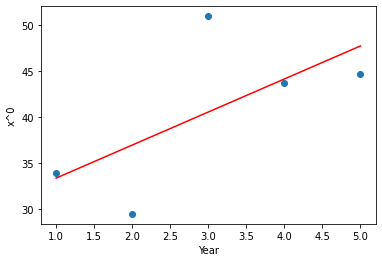

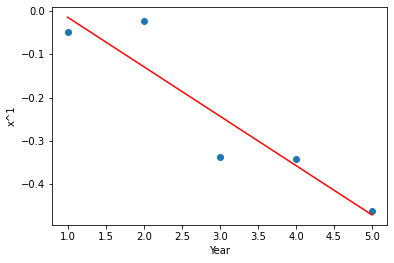

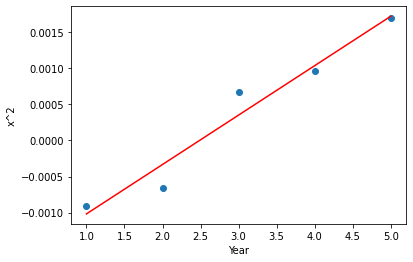

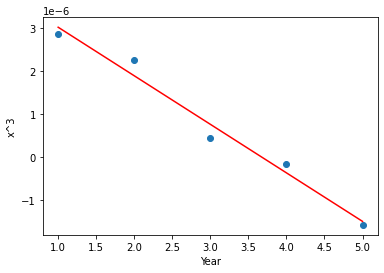

[51.334519927432396, -0.5850811583630613, 0.0024036729321773235, -2.616376123901775e-06]
35TChangPhueak


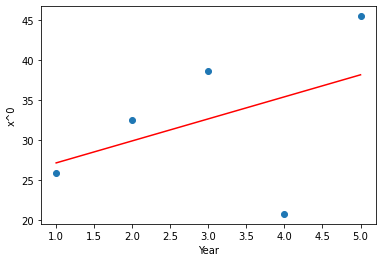

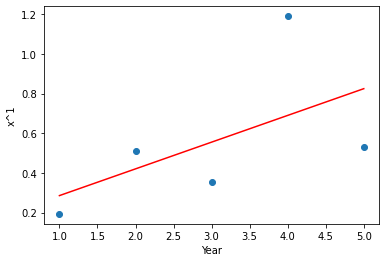

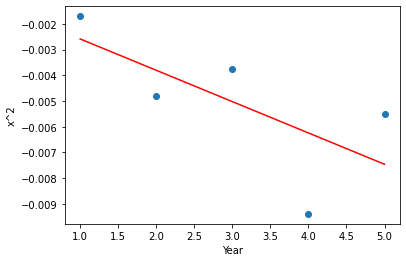

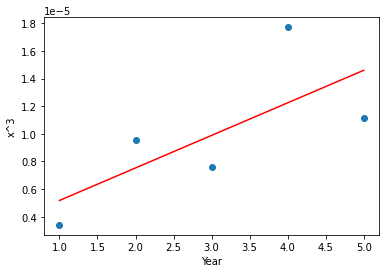

[40.917145169556136, 0.960000994477057, -0.008681286704451983, 1.6952727087919894e-05]
36TSiPhum


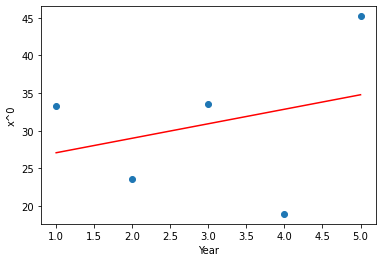

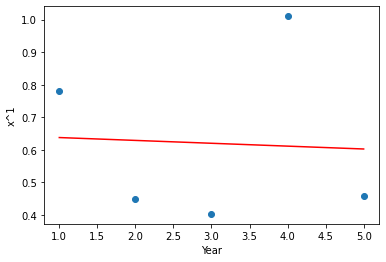

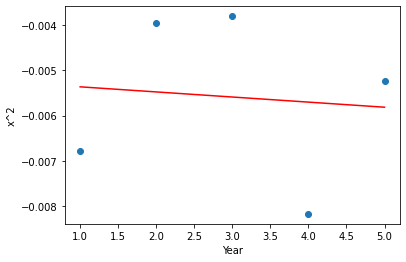

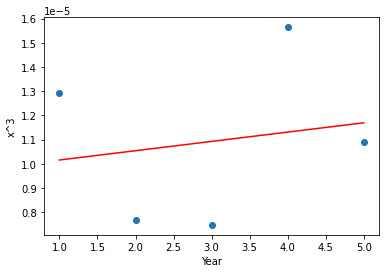

[36.69684377868629, 0.593465427201912, -0.005928105480858886, 1.2075501403567038e-05]
40TMaeMo


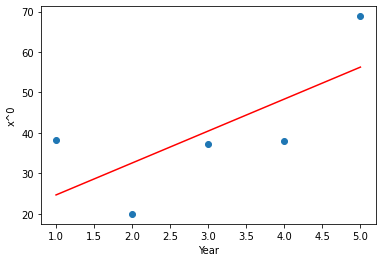

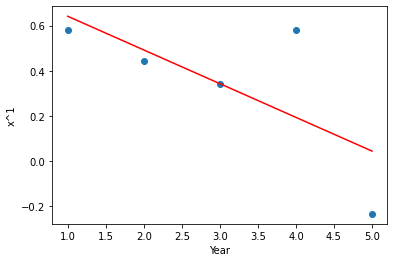

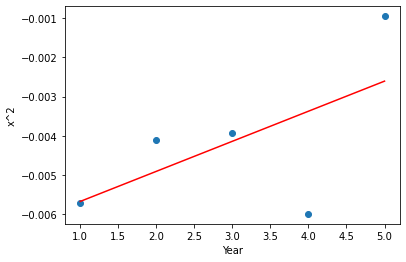

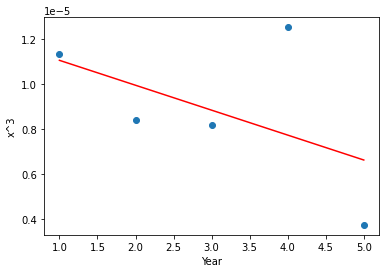

[64.16508643205354, -0.1064637255952996, -0.0018402956101005999, 5.511405144917376e-06]
46TNaiMueang


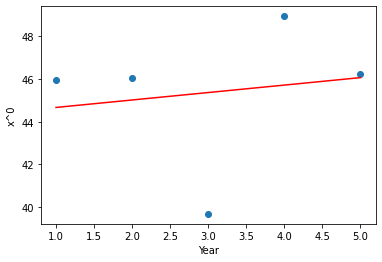

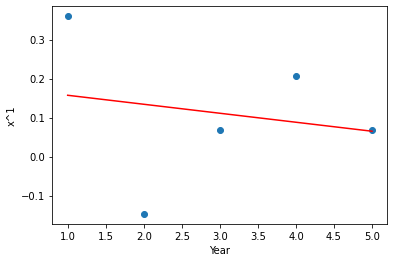

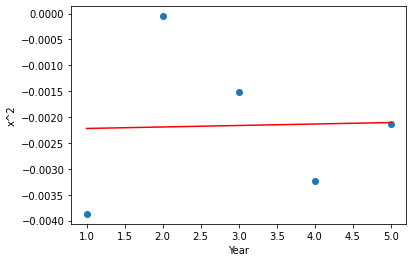

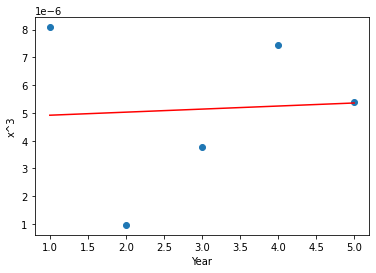

[46.41967137863457, 0.041912522017256676, -0.0020759682583259614, 5.4674843233879595e-06]
44THatYai


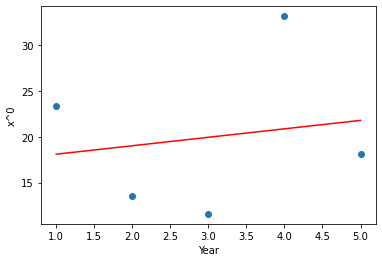

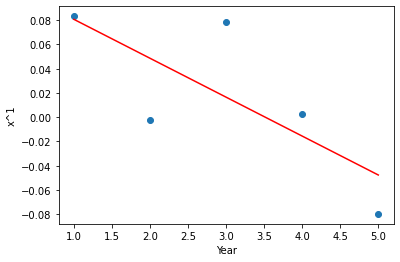

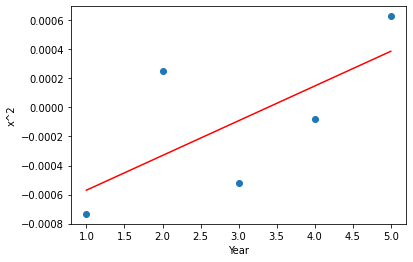

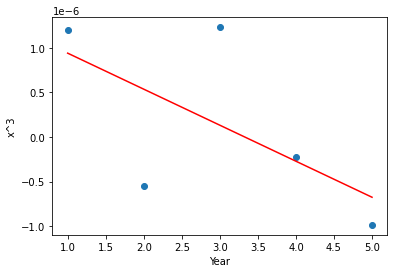

[22.71714085743106, -0.07973194034514082, 0.000625774327060225, -1.0794129493891065e-06]
75THuaiKon


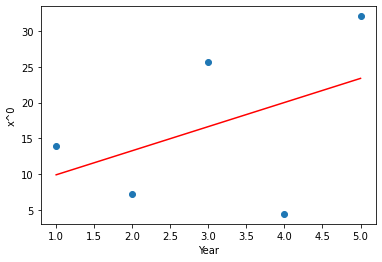

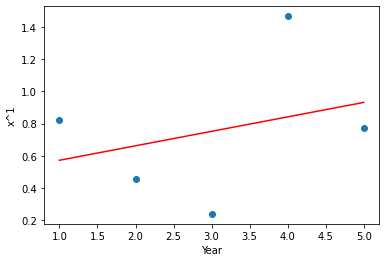

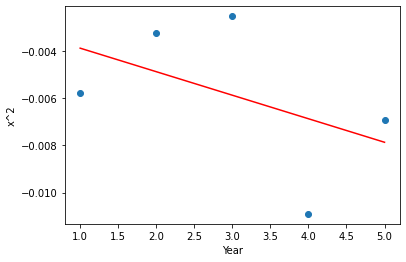

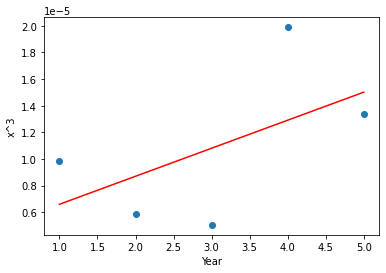

[26.727108172801326, 1.0212344961416082, -0.008862523152010412, 1.7121116644708328e-05]
76TMaePa


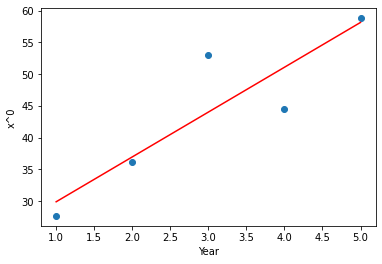

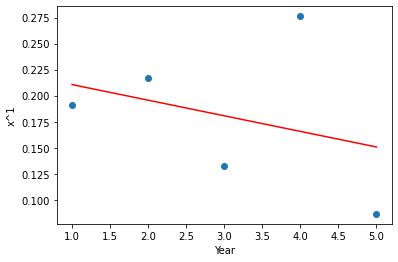

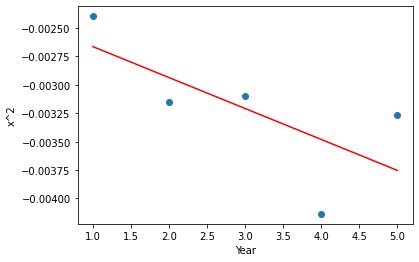

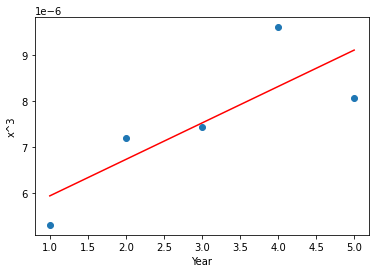

[65.21597207072857, 0.13567228241222118, -0.00402489221108014, 9.892058267320615e-06]
77TThaTum


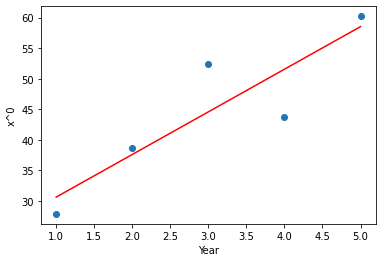

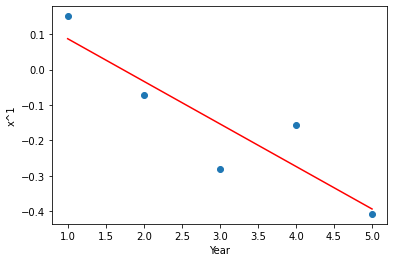

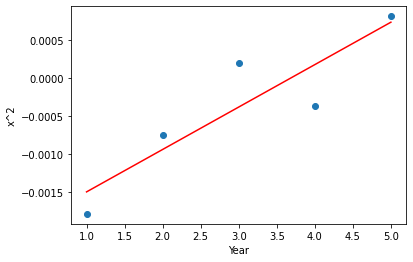

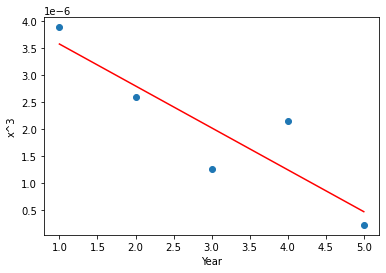

[65.49358171911305, -0.5133048049567868, 0.0012966308112448213, -3.1558837805749996e-07]


In [ ]:
futureEq = []
xCal = [1,2,3,4,5]
#print(len(theta),len(theta[0]),len(theta[0][0])) #19 4 5
for ii in range(0,19):
  print(list_s[ii])
  tempFutureEq = []
  for i in range(0,4):
    #print(theta[ii][i])
    model = numpy.poly1d(numpy.polyfit(xCal,theta[ii][i],1))
    line = numpy.linspace(1,len(xCal),50)
    plt.scatter(xCal,theta[ii][i])
    plt.plot(line , model(line), "r-")
    plt.xlabel('Year')
    plt.ylabel('x^'+str(i))
    plt.show()
    tempFutureEq.append(model(6))
  futureEq.append(tempFutureEq)
  print(tempFutureEq)

05TฺBangNa
2021


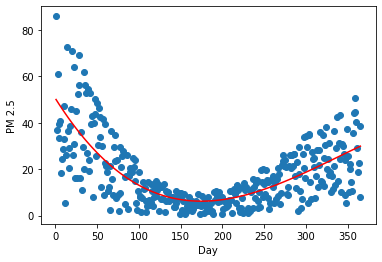

59TPhayaThai
2021


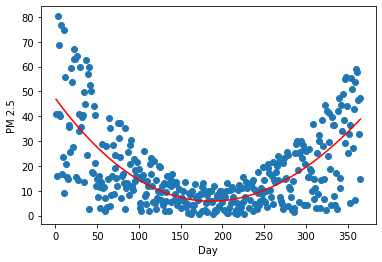

61TPhlabphla
2021


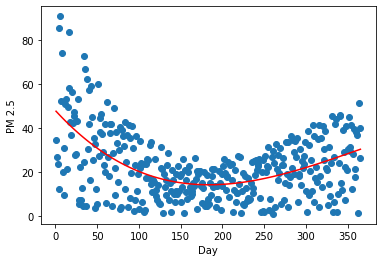

52TBangYiRuea
2021


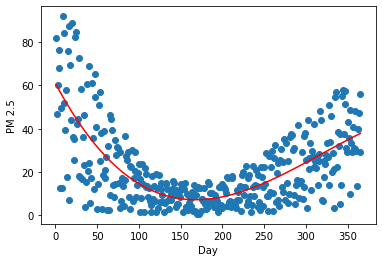

54TDinDaeng
2021


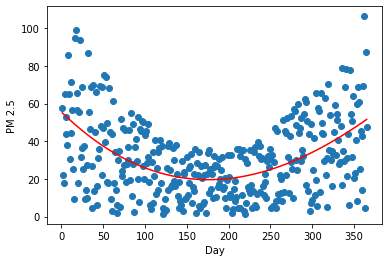

08TSongKhanong
2021


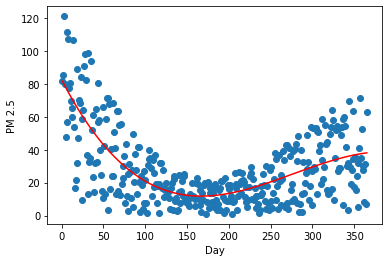

24TNaPhraLan
2021


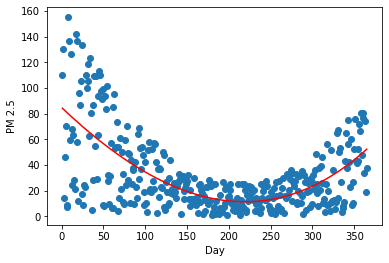

26TNaMueang
2021


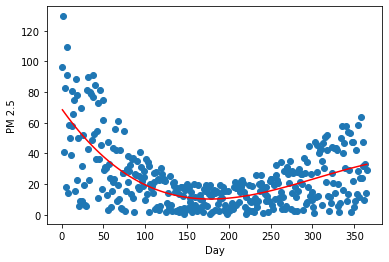

27TMahachai
2021


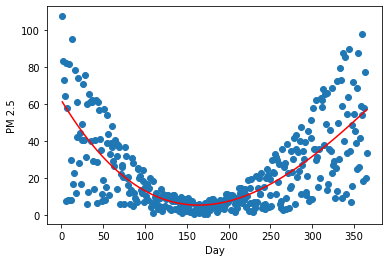

30TThaPradu
2021


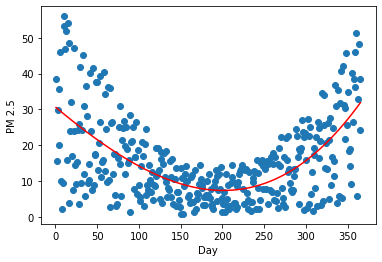

32TThungSukhla
2021


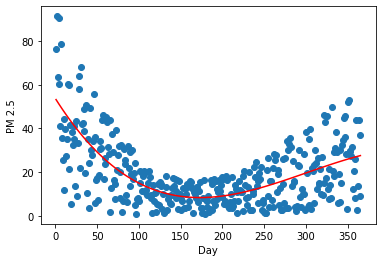

35TChangPhueak
2021


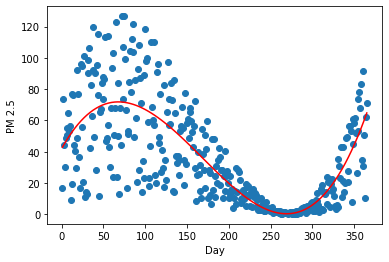

36TSiPhum
2021


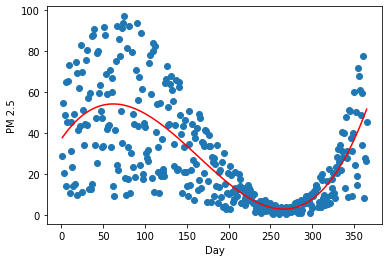

40TMaeMo
2021


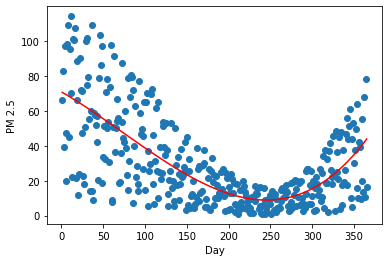

46TNaiMueang
2021


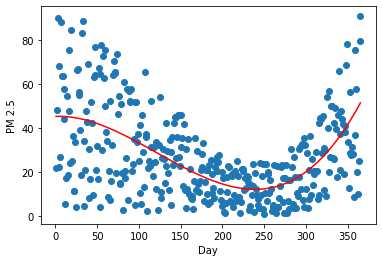

44THatYai
2021


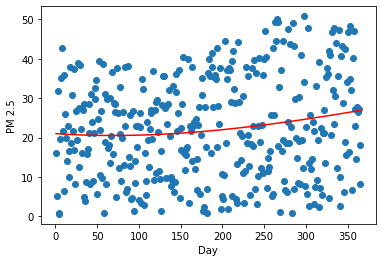

75THuaiKon
2021


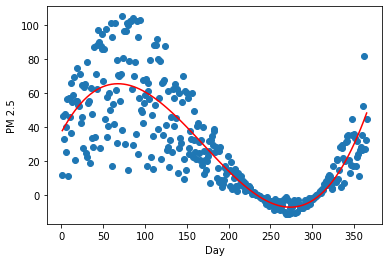

76TMaePa
2021


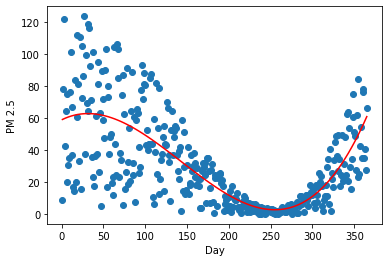

77TThaTum
2021


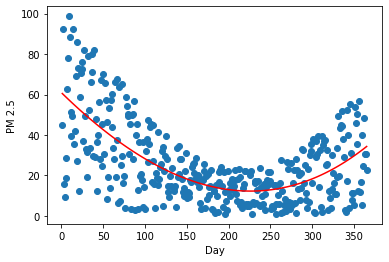

In [ ]:
import random
for ii in range(0,19):
  print(list_s[ii])
  futureX = []
  future = []
  for i in range (1,366):
    futureX.append(i)
    temp = 0
    for j in range(0,4):
      temp += futureEq[ii][j]*pow(i,j)
    future.append(random.uniform(temp-(temp*(newCoSim[ii])),temp+(temp*(newCoSim[ii]))))
    #if i < 125 or i > 270:
    #  future.append(random.uniform(temp-15,temp+15))
    #elif i < 175 or i > 230:
    #  future.append(random.uniform(temp-7,temp+7))
    #else:
    #  future.append(random.uniform(temp-3,temp+3))
  model = numpy.poly1d(numpy.polyfit(futureX,future,3))
  line = numpy.linspace(1,len(futureX),100)
  plt.scatter(futureX,future)
  plt.plot(line , model(line), "r-")
  plt.xlabel('Day')
  plt.ylabel('PM 2.5')
  print(2021)
  plt.show()
  for i in range(0,365):
    arr[ii][i].append(future[i])
  coSimF = dat.getCoSim(arr[ii],5)
  #print(coSimF)


05TฺBangNa
       2016 2017 2018 2019 2020
0        30   33   17   15   22
1        30   28   25   21   24
2        30   31   34   24   28
3        30   37   41   27   35
4        30   45   42   33   41
..  ..  ...  ...  ...  ...  ...
361      32   18   65   37   32
362      29   14   25   40   16
363      49   14   14   39   24
364      49   15   17   33   21
365      46                  17

[366 rows x 6 columns]

59TPhayaThai
       2016 2017 2018 2019 2020
0        17   21   21   23   20
1        22   19   26   23   24
2        28   19   38   24   27
3        42   21   39   28   34
4        35   29   51   35   38
..  ..  ...  ...  ...  ...  ...
361      20   21   60   33   28
362      17   15   18   36   18
363      31   22   19   35   25
364      29   18   14   36   25
365      27                  17

[366 rows x 6 columns]

61TPhlabphla
       2016 2017 2018 2019 2020
0        28   28   30   33   20
1        30   27   33   33   26
2        30   32   42   33   32
3        30   34

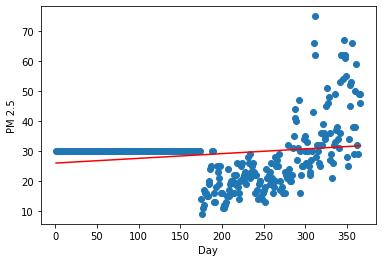

 
0.01578 x + 25.97
2017


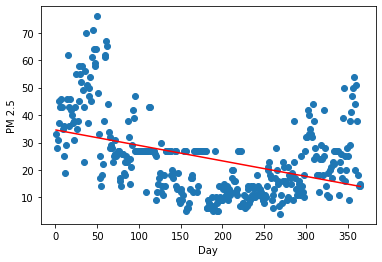

 
-0.05648 x + 34.61
2018


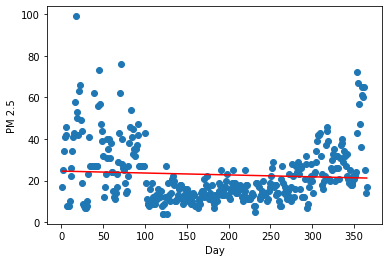

 
-0.00911 x + 24.57
2019


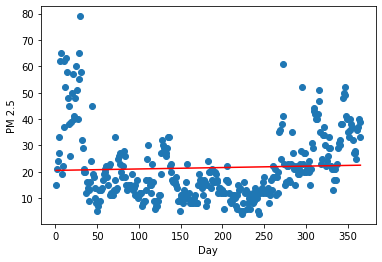

 
0.005393 x + 20.52
2020


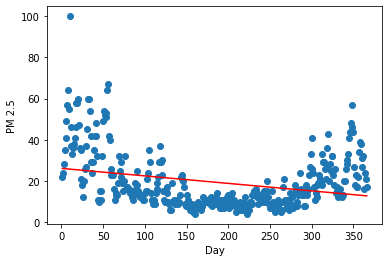

 
-0.03645 x + 26.12
59TPhayaThai
2016


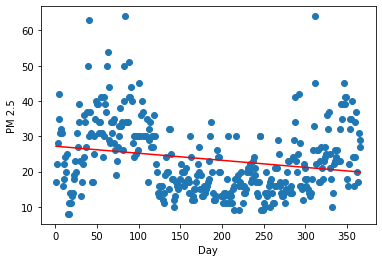

 
-0.02 x + 27.18
2017


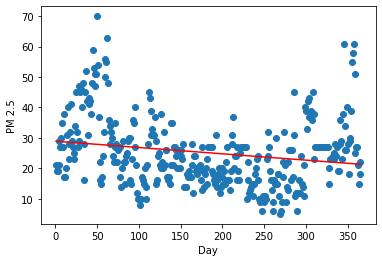

 
-0.0208 x + 28.92
2018


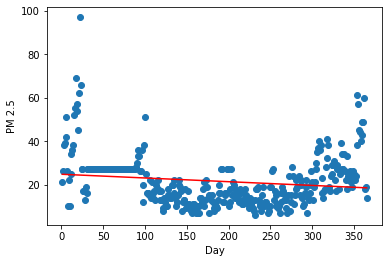

 
-0.01714 x + 24.72
2019


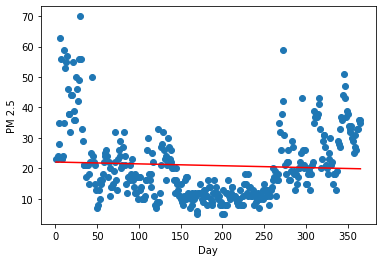

 
-0.006088 x + 22.06
2020


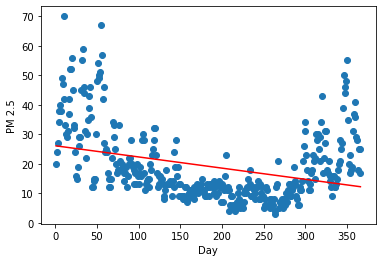

 
-0.03794 x + 26.11
61TPhlabphla
2016


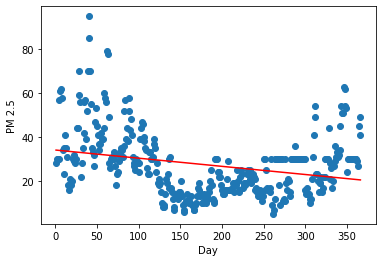

 
-0.0372 x + 34.1
2017


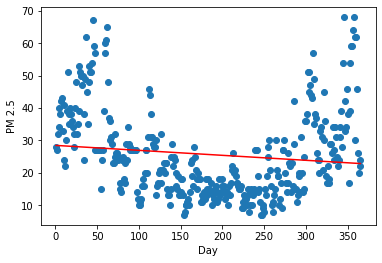

 
-0.01537 x + 28.46
2018


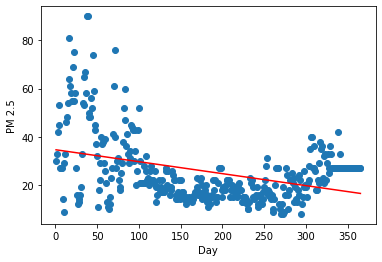

 
-0.04971 x + 34.64
2019


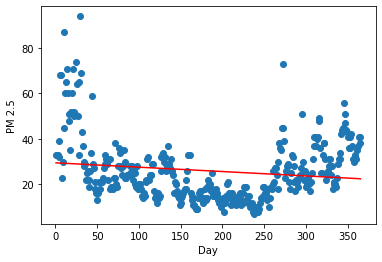

 
-0.01923 x + 29.5
2020


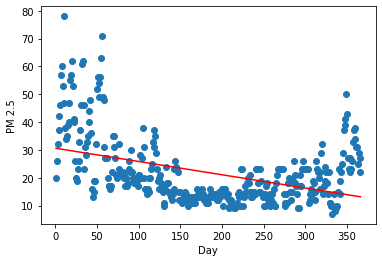

 
-0.04771 x + 30.61
52TBangYiRuea
2016


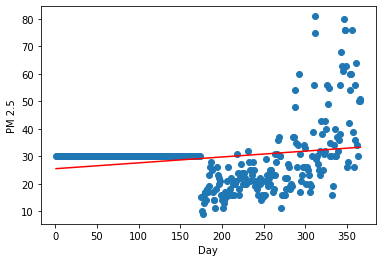

 
0.02137 x + 25.46
2017


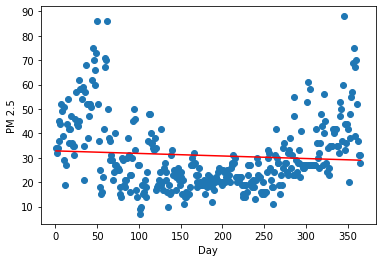

 
-0.01045 x + 32.83
2018


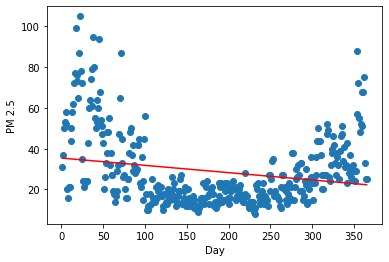

 
-0.03584 x + 35.41
2019


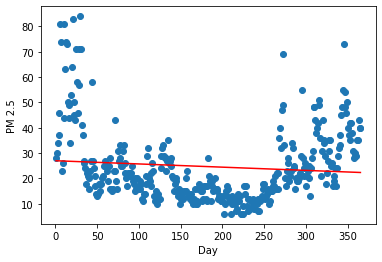

 
-0.01272 x + 26.99
2020


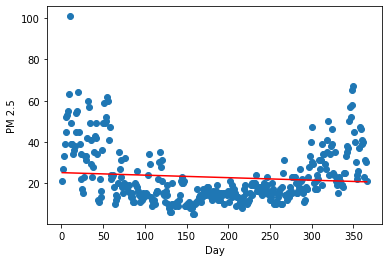

 
-0.01221 x + 25.05
54TDinDaeng
2016


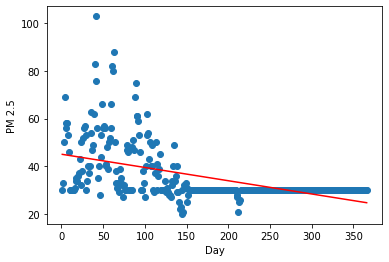

 
-0.05564 x + 45.07
2017


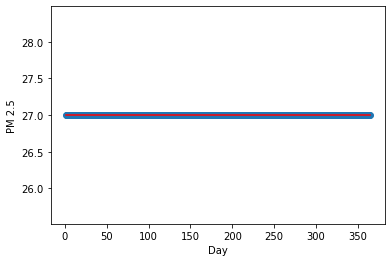

 
2.112e-17 x + 27
2018


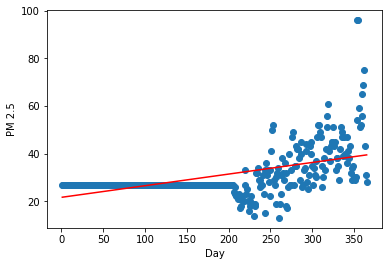

 
0.04881 x + 21.65
2019


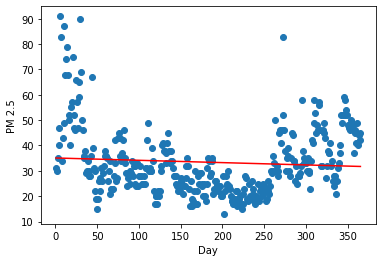

 
-0.009174 x + 35.08
2020


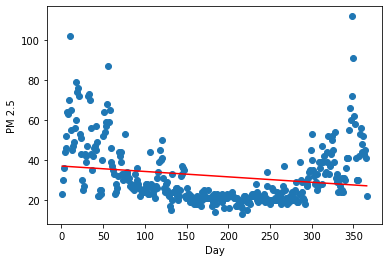

 
-0.02704 x + 36.97
08TSongKhanong
2016


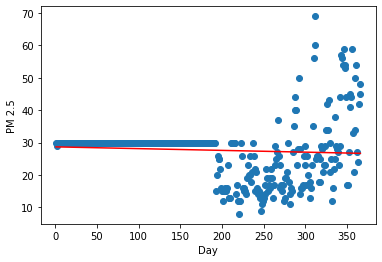

 
-0.005439 x + 28.69
2017


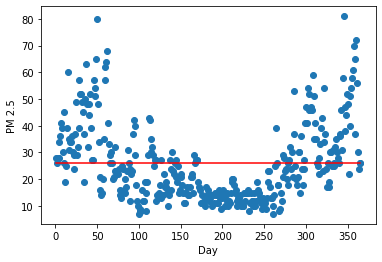

 
-2.344e-05 x + 25.96
2018


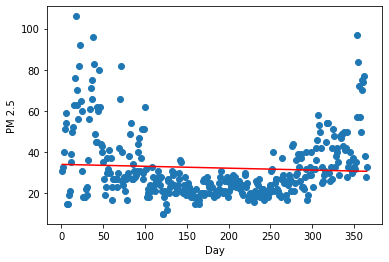

 
-0.009232 x + 34.06
2019


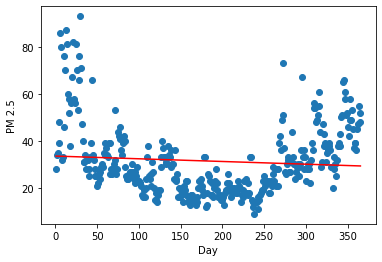

 
-0.0115 x + 33.58
2020


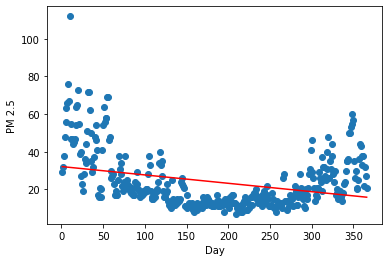

 
-0.04447 x + 32.16
24TNaPhraLan
2016


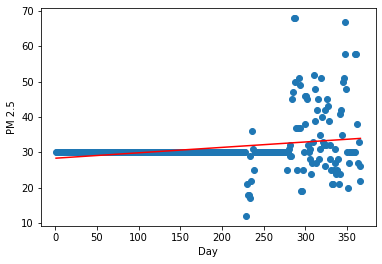

 
0.01534 x + 28.35
2017


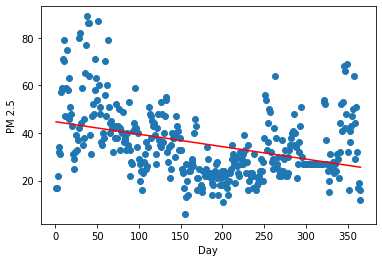

 
-0.05235 x + 44.71
2018


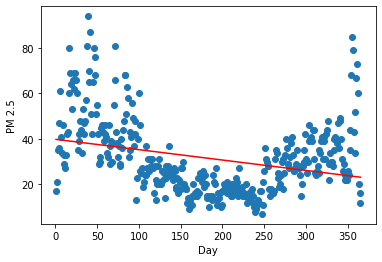

 
-0.04577 x + 39.86
2019


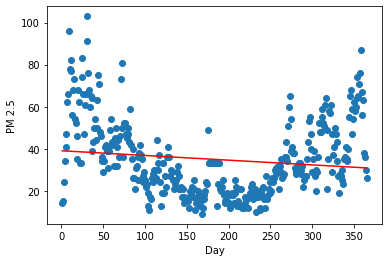

 
-0.0224 x + 39.04
2020


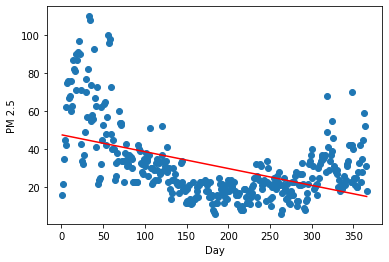

 
-0.08862 x + 47.62
26TNaMueang
2016


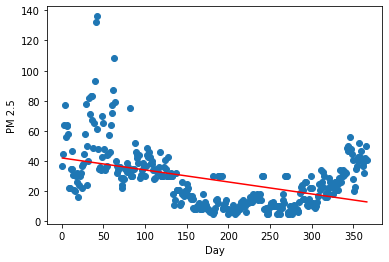

 
-0.07964 x + 42.11
2017


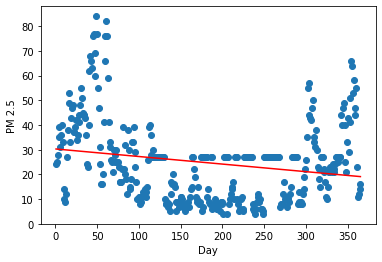

 
-0.03068 x + 30.3
2018


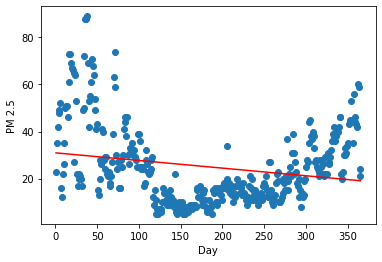

 
-0.03251 x + 30.96
2019


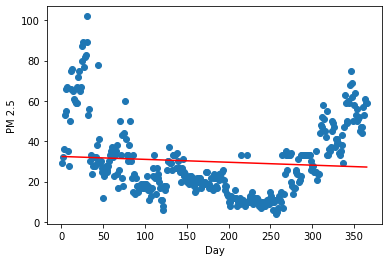

 
-0.01439 x + 32.49
2020


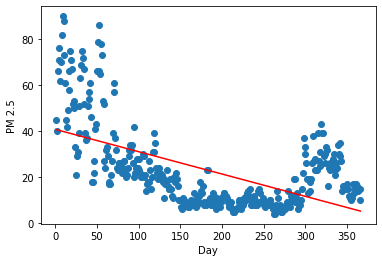

 
-0.09716 x + 40.79
27TMahachai
2016


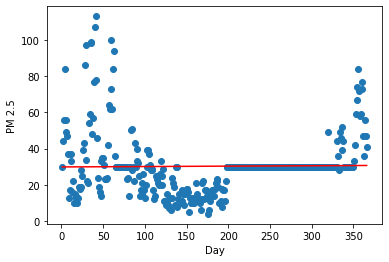

 
0.002207 x + 29.91
2017


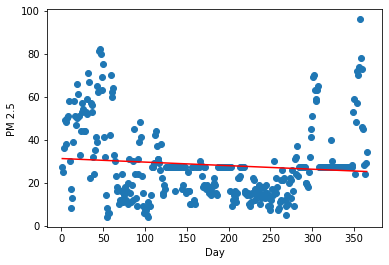

 
-0.01655 x + 31.17
2018


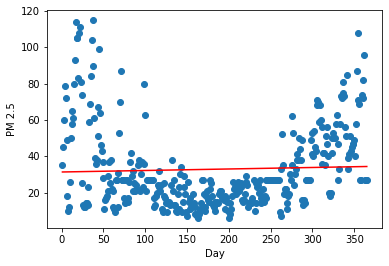

 
0.008282 x + 31.33
2019


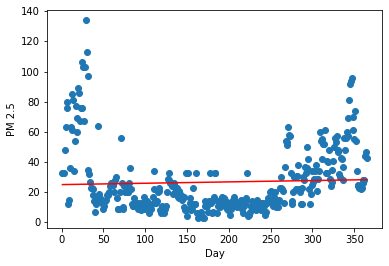

 
0.00896 x + 25.08
2020


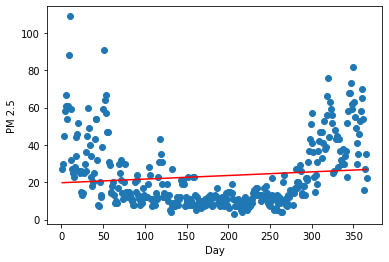

 
0.01942 x + 19.72
30TThaPradu
2016


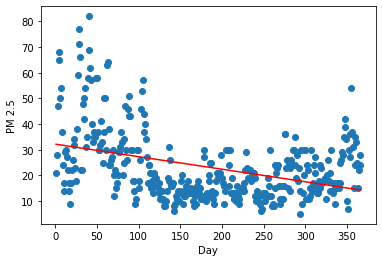

 
-0.04886 x + 32.19
2017


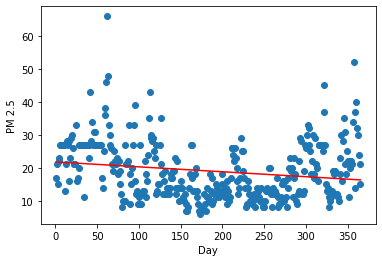

 
-0.01497 x + 21.79
2018


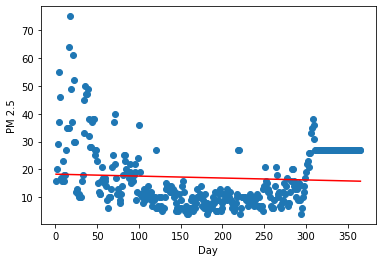

 
-0.006926 x + 18.28
2019


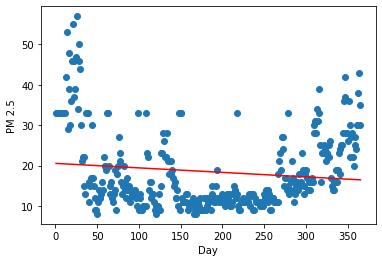

 
-0.01119 x + 20.53
2020


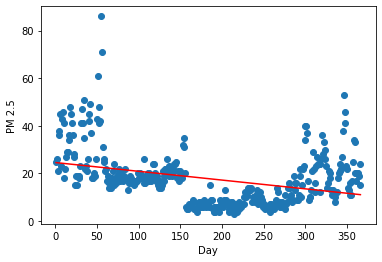

 
-0.03685 x + 24.58
32TThungSukhla
2016


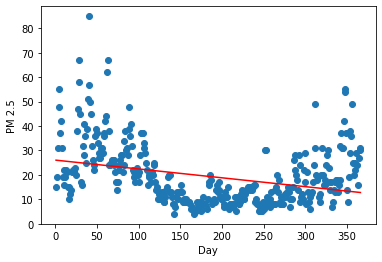

 
-0.03629 x + 26.06
2017


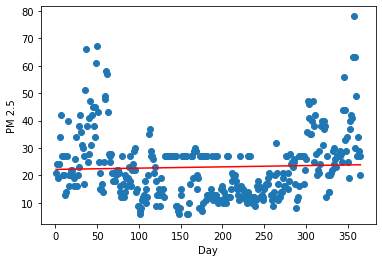

 
0.004644 x + 22.21
2018


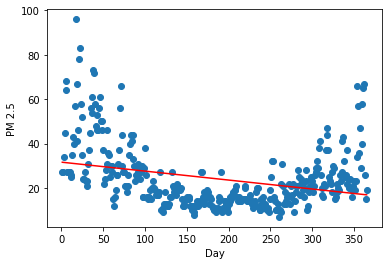

 
-0.04031 x + 31.65
2019


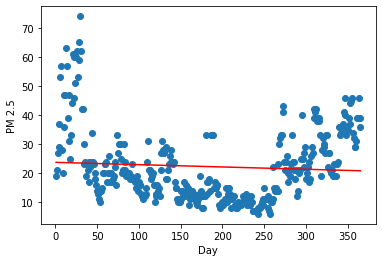

 
-0.007941 x + 23.74
2020


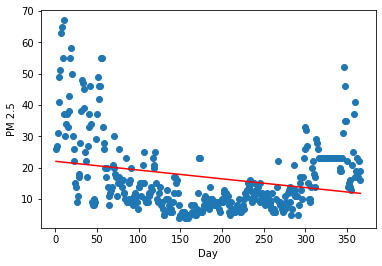

 
-0.02795 x + 22.05
35TChangPhueak
2016


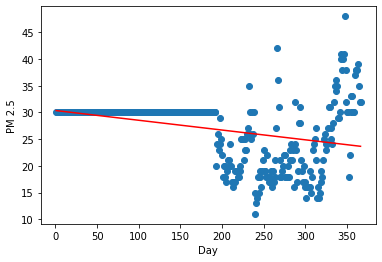

 
-0.01831 x + 30.36
2017


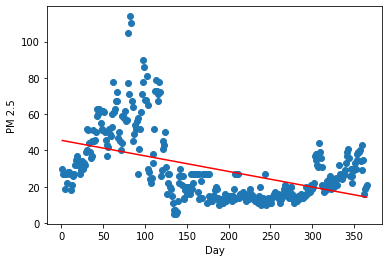

 
-0.08581 x + 45.58
2018


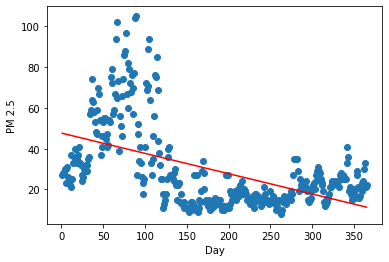

 
-0.09961 x + 47.66
2019


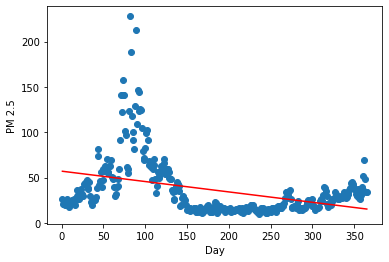

 
-0.1144 x + 57.15
2020


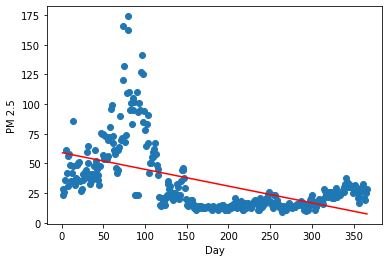

 
-0.1411 x + 59.06
36TSiPhum
2016


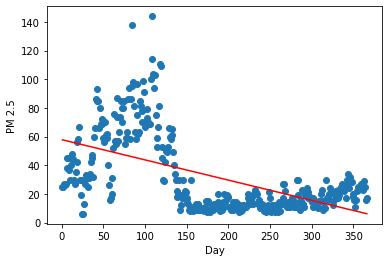

 
-0.1413 x + 57.86
2017


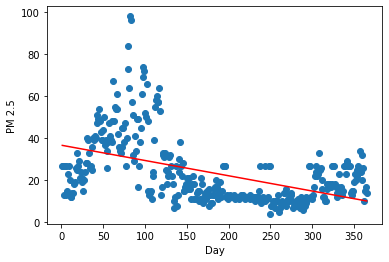

 
-0.07261 x + 36.66
2018


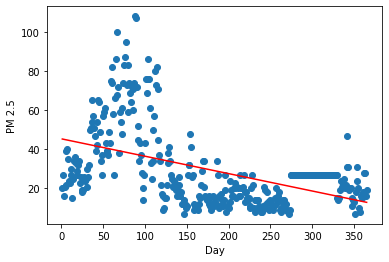

 
-0.08889 x + 45.36
2019


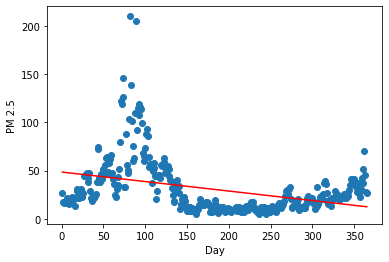

 
-0.09866 x + 48.44
2020


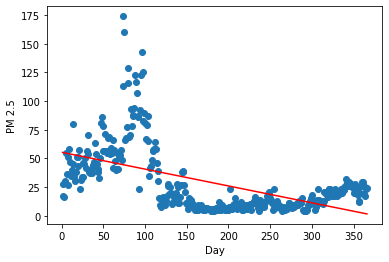

 
-0.1469 x + 55.31
40TMaeMo
2016


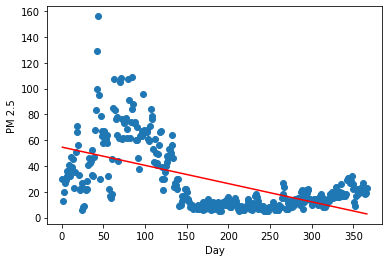

 
-0.1415 x + 54.62
2017


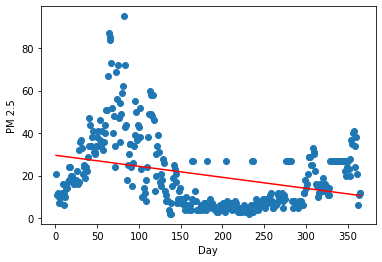

 
-0.05195 x + 29.61
2018


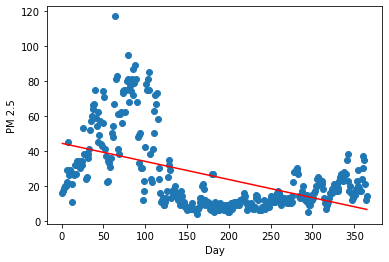

 
-0.1037 x + 44.4
2019


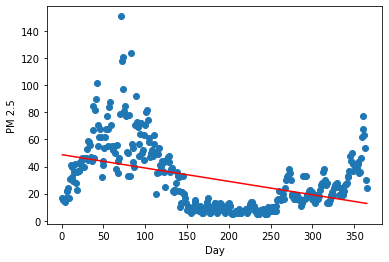

 
-0.0988 x + 48.79
2020


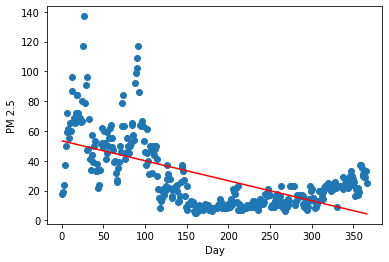

 
-0.1342 x + 53.4
46TNaiMueang
2016


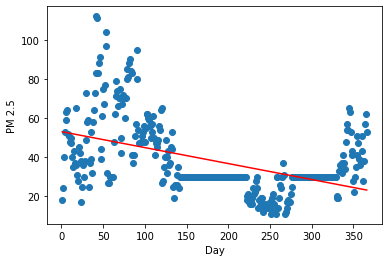

 
-0.08154 x + 53.04
2017


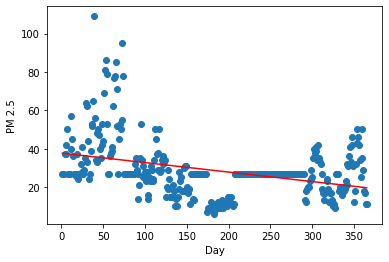

 
-0.04946 x + 37.7
2018


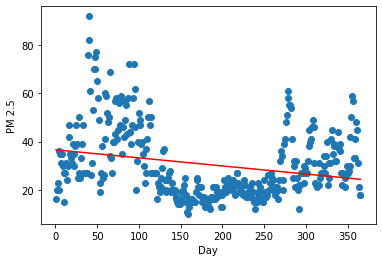

 
-0.03359 x + 36.61
2019


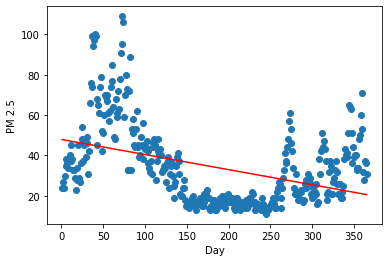

 
-0.07487 x + 47.91
2020


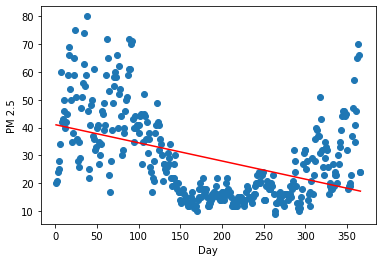

 
-0.06524 x + 41.06
44THatYai
2016


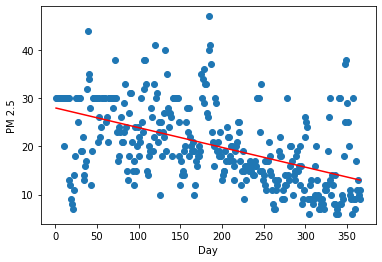

 
-0.04099 x + 27.99
2017


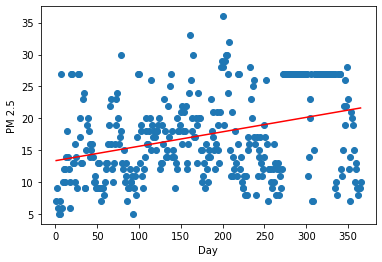

 
0.02266 x + 13.34
2018


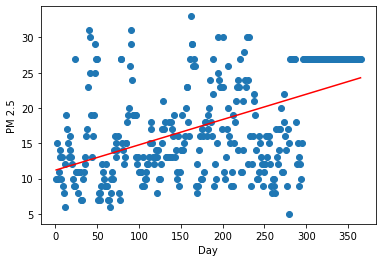

 
0.03586 x + 11.19
2019


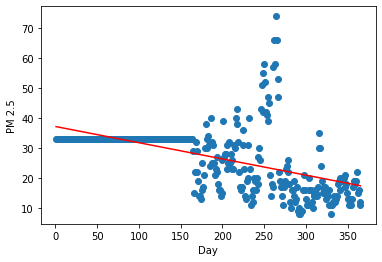

 
-0.05421 x + 37.2
2020


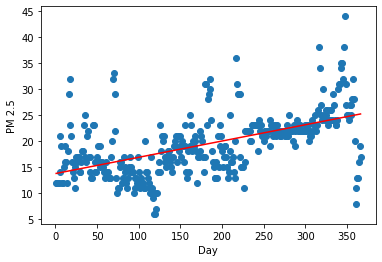

 
0.03131 x + 13.75
75THuaiKon
2016


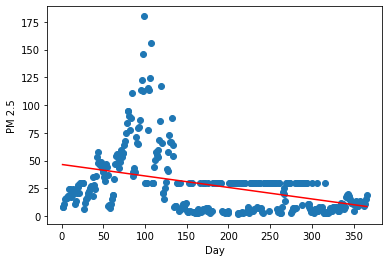

 
-0.1035 x + 46.53
2017


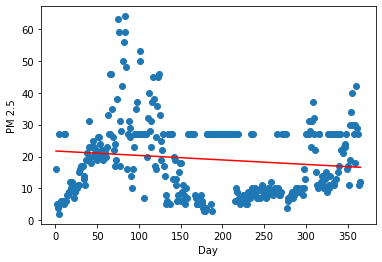

 
-0.01404 x + 21.74
2018


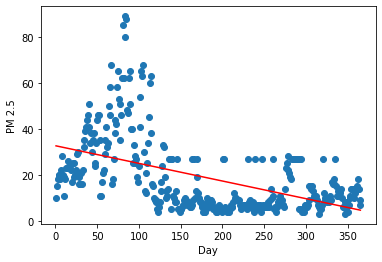

 
-0.07687 x + 32.69
2019


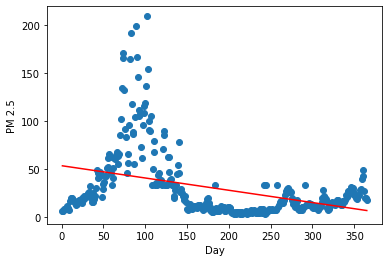

 
-0.128 x + 53.25
2020


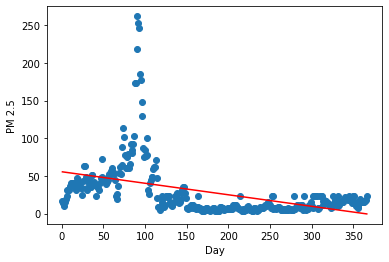

 
-0.153 x + 55.62
76TMaePa
2016


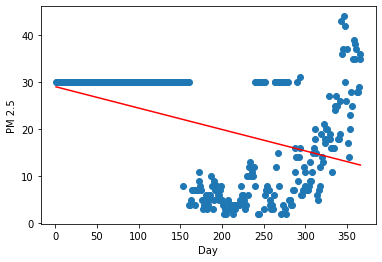

 
-0.04554 x + 29.05
2017


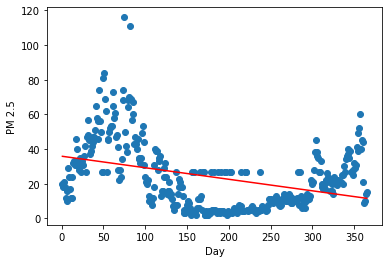

 
-0.06656 x + 35.86
2018


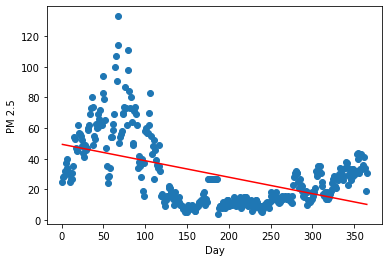

 
-0.1075 x + 49.47
2019


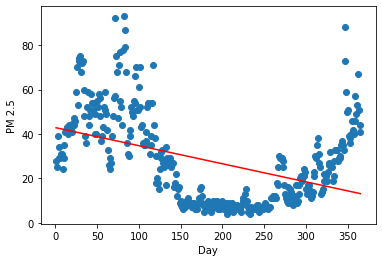

 
-0.08147 x + 42.87
2020


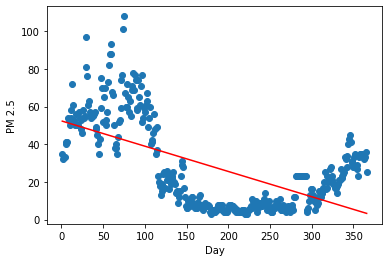

 
-0.1342 x + 52.4
77TThaTum
2016


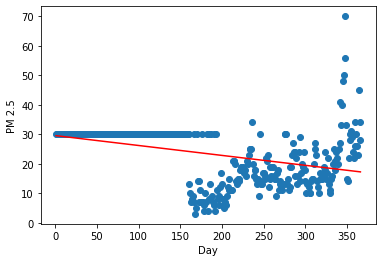

 
-0.03362 x + 29.55
2017


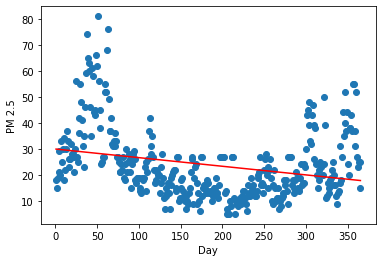

 
-0.0332 x + 29.96
2018


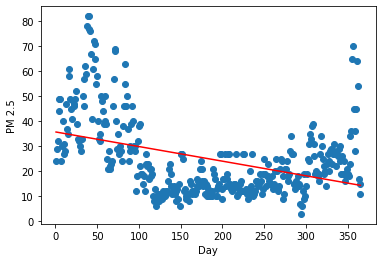

 
-0.05854 x + 35.79
2019


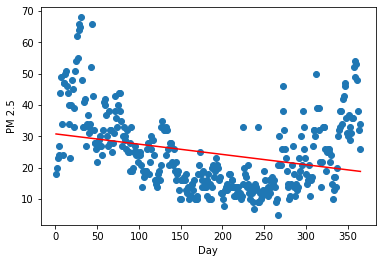

 
-0.0328 x + 30.83
2020


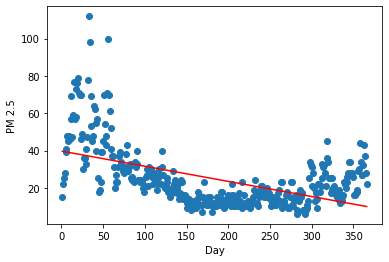

 
-0.0812 x + 39.69


In [ ]:
arr = [wb.worksheet(e).get_all_values() for e in list_s] 

arr[0]
for i in range(len(list_s)):  
  df = pd.DataFrame.from_records(arr[i][1:],columns = arr[i][0])
  print('\n'+list_s[i])
  print(df)

for k in range(len(list_s)):
  arr[k] = [[int(arr[k][i][e]) if arr[k][i][e]!='' else 0  for e in range(1,6)] for i in range(1,len(arr[k])) ]
g = []
xG = []
yG = []
theta = []
linearData = []
for ii in range(0,19):
  print(list_s[ii])
  g.append(Graph(arr[ii]))
  xG.append(g[ii].getShort5X())
  yG.append(g[ii].getShort5Y())
  temptheta = [[],[],[],[]]
  templinearData = []
  for i in range(0,5):
    temp = 2016+i
    print(temp)
    model = numpy.poly1d(numpy.polyfit(xG[ii][i],yG[ii][i],1))
    line = numpy.linspace(1,len(xG[ii][i]),366)
    plt.scatter(xG[ii][i],yG[ii][i])
    plt.plot(line , model(line), "r-")
    plt.xlabel('Day')
    plt.ylabel('PM 2.5')
    plt.show()
    print(model)
    templinearData.append(model(line))
    for i in range(0,4):
      temptheta[i].append(model[i])
  linearData.append(templinearData)
  theta.append(temptheta)

[25.98820744181892, 26.003991798077532, 26.01977615433615, 26.035560510594767, 26.051344866853384, 26.067129223111998, 26.082913579370615, 26.098697935629232, 26.11448229188785, 26.130266648146463, 26.14605100440508, 26.161835360663698, 26.177619716922315, 26.19340407318093, 26.209188429439546, 26.224972785698164, 26.24075714195678, 26.256541498215395, 26.272325854474012, 26.28811021073263, 26.303894566991243, 26.31967892324986, 26.335463279508478, 26.351247635767095, 26.36703199202571, 26.382816348284326, 26.398600704542943, 26.41438506080156, 26.430169417060174, 26.44595377331879, 26.46173812957741, 26.477522485836026, 26.49330684209464, 26.509091198353257, 26.524875554611874, 26.54065991087049, 26.556444267129105, 26.572228623387723, 26.58801297964634, 26.603797335904957, 26.61958169216357, 26.63536604842219, 26.651150404680806, 26.66693476093942, 26.682719117198037, 26.698503473456654, 26.71428782971527, 26.730072185973885, 26.745856542232502, 26.76164089849112, 26.777425254749737,

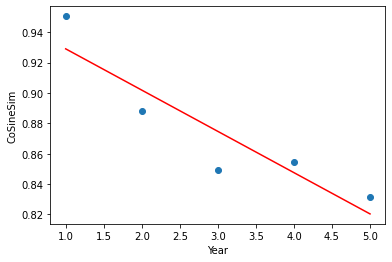

[0.9225164595588774, 0.9161588176023111, 0.8835624927093361, 0.8718357159958958, 0.8563191629663758]


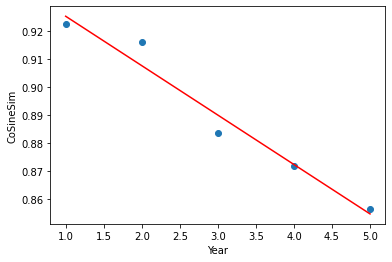

[0.8909633401340564, 0.887416054026091, 0.8977523075405218, 0.886271339133823, 0.8985298755051345]


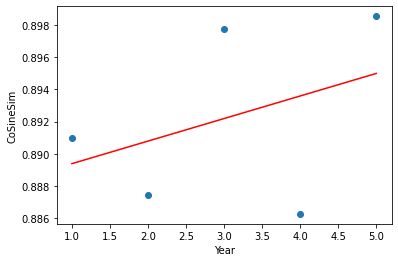

[0.9394710622283581, 0.9046128339620528, 0.8540496077982669, 0.8570682723322403, 0.8593310089132548]


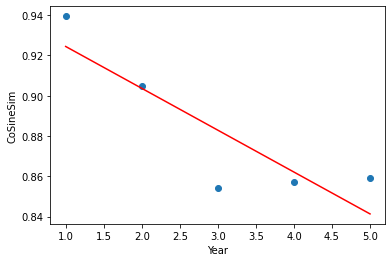

[0.9658815219785722, 0.9999999999999998, 0.9662303982751397, 0.928879901437828, 0.907193259405787]


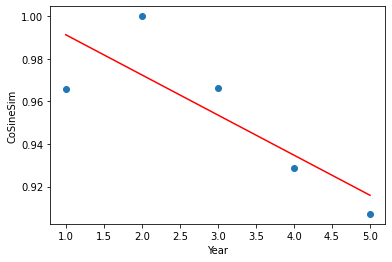

[0.9529411485430611, 0.8723775945635261, 0.8959784728788438, 0.9015024747523144, 0.8601850791774274]


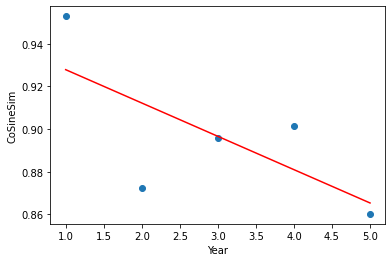

[0.9811534309946564, 0.9322775798502057, 0.8975251746135479, 0.8923048336525454, 0.8860889799060903]


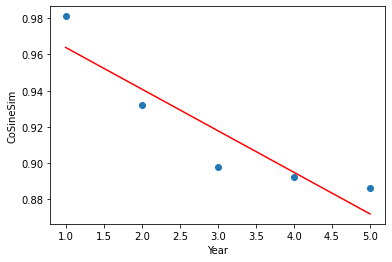

[0.8510398177461844, 0.8451720866540242, 0.8416496637546312, 0.854873558330146, 0.8601715044054936]


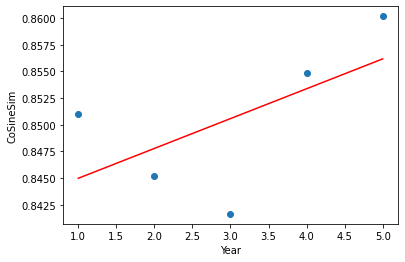

[0.8708631115775248, 0.8615621663748465, 0.8219500872905057, 0.7730992983232651, 0.7896092422827471]


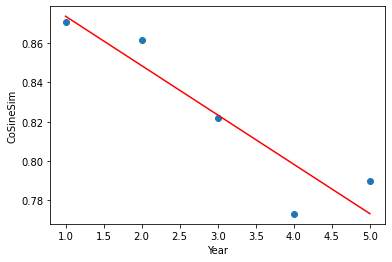

[0.8856110176562959, 0.9133338252888362, 0.8381358856116167, 0.8888080588625153, 0.857809692881345]


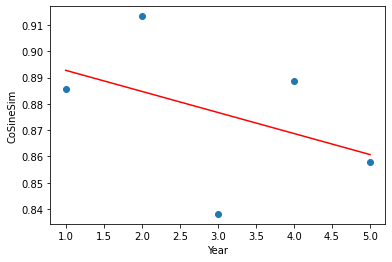

[0.8582531814598725, 0.8944956299364223, 0.8735178486676268, 0.8746940386590915, 0.8284106764255235]


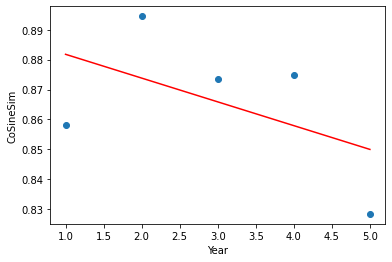

[0.9796946402036141, 0.8799670613201108, 0.8758258130004819, 0.7921183892581463, 0.8360690471736248]


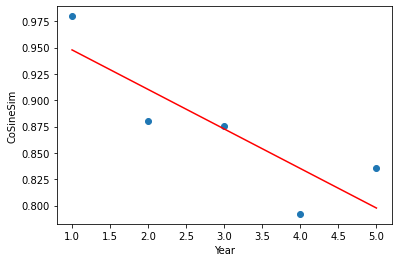

[0.8447007188380382, 0.8721710432264866, 0.8678084262474337, 0.7733011304885489, 0.8058210382188155]


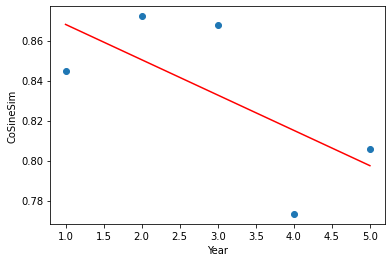

[0.8365751046077272, 0.7955734220887308, 0.8316088819355749, 0.8317179386594797, 0.8663474973445349]


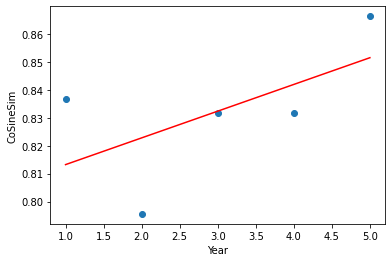

[0.9245520652085759, 0.9070289096602355, 0.9091264027516195, 0.8887080754293838, 0.9028272287557492]


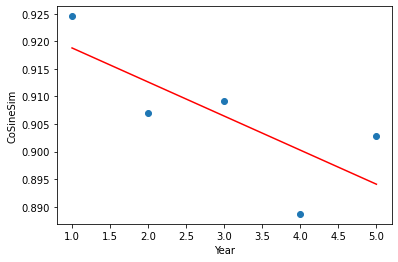

[0.9454179396786518, 0.9383786881990535, 0.9492774367308149, 0.9555501418863843, 0.9708972259579594]


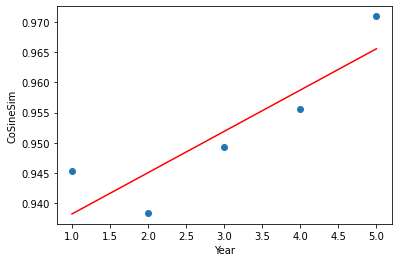

[0.7699516668567086, 0.8601597961975401, 0.8226507679676348, 0.7103893123376281, 0.7023773996033789]


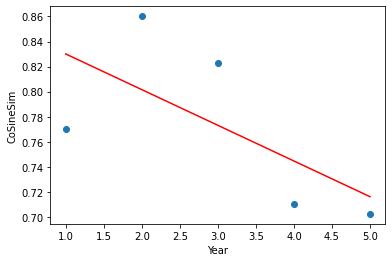

[0.8964420605522218, 0.8164668594582076, 0.8524996660438041, 0.8456935223586186, 0.8577009920689648]


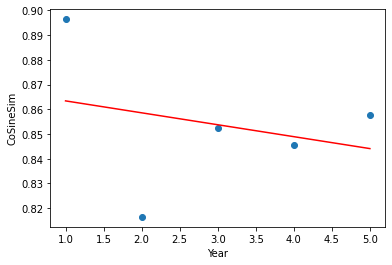

[0.9412346295799213, 0.8806596730710364, 0.8758080241887154, 0.9067790522728238, 0.8815767010893653]


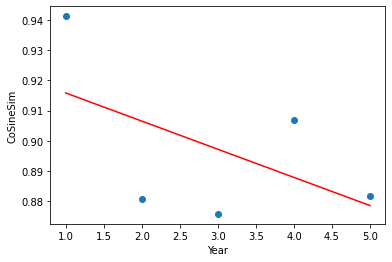

[0.7931557227263397, 0.8370632213291337, 0.8963830900228921, 0.820559156568829, 0.8970880291071428, 0.8496807764202908, 0.8488395052909719, 0.8589707796765181, 0.748125599177437, 0.852701171267255, 0.8420282946258988, 0.760205032754613, 0.7797716892109502, 0.8610713595405188, 0.8879173842201612, 0.9723432943643565, 0.6876300830826069, 0.8392839778765324, 0.8692526727065754]


In [ ]:
newCoSim = []
xCoSim = [1,2,3,4,5]
print(linearData[0][0].tolist())
#print(type(yG[0][0][0]))
for i in range(0,19):
  #print(list_s[i])
  temp = []
  for j in range(0,5):
    tl = linearData[i][j].tolist()
    temp.append(dat.getNewCoSim(yG[i][j],tl))
  print(temp)
  model = numpy.poly1d(numpy.polyfit(xCoSim,temp,1))
  line = numpy.linspace(1,len(xCoSim),50)
  plt.scatter(xCal,temp)
  plt.plot(line , model(line), "r-")
  plt.xlabel('Year')
  plt.ylabel('CoSineSim')
  plt.show()
  newCoSim.append(model(6))
print(newCoSim)


05TฺBangNa


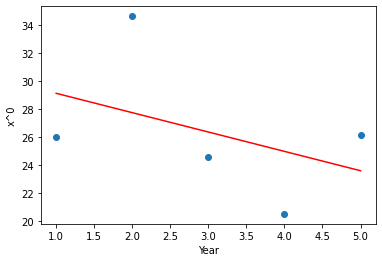

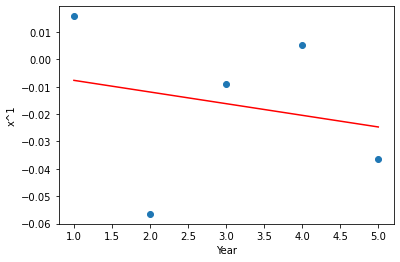

[[22.21616135642185, -0.02895456056654671]]
59TPhayaThai


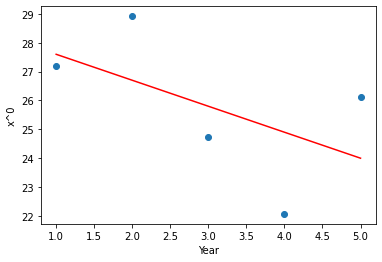

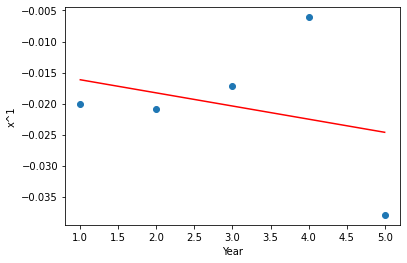

[[22.21616135642185, -0.02895456056654671], [23.0964088991329, -0.026744818564294264]]
61TPhlabphla


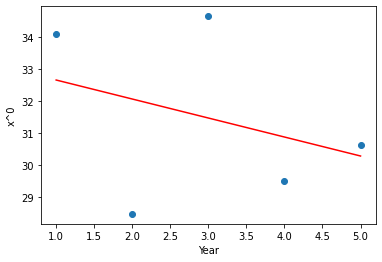

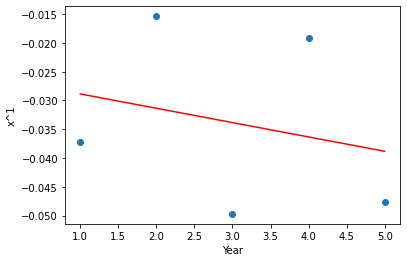

[[22.21616135642185, -0.02895456056654671], [23.0964088991329, -0.026744818564294264], [29.678666882185848, -0.04130903446234441]]
52TBangYiRuea


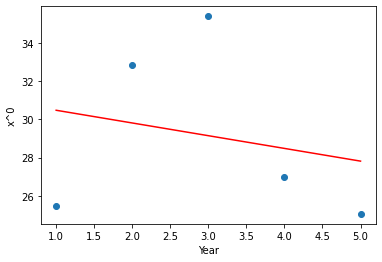

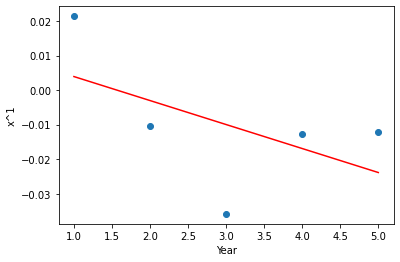

[[22.21616135642185, -0.02895456056654671], [23.0964088991329, -0.026744818564294264], [29.678666882185848, -0.04130903446234441], [27.149414758458093, -0.030797014508935086]]
54TDinDaeng


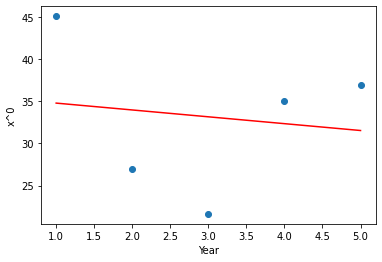

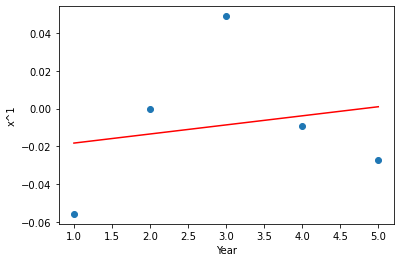

[[22.21616135642185, -0.02895456056654671], [23.0964088991329, -0.026744818564294264], [29.678666882185848, -0.04130903446234441], [27.149414758458093, -0.030797014508935086], [30.7166869764714, 0.005795828597515672]]
08TSongKhanong


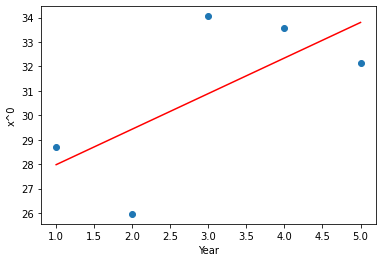

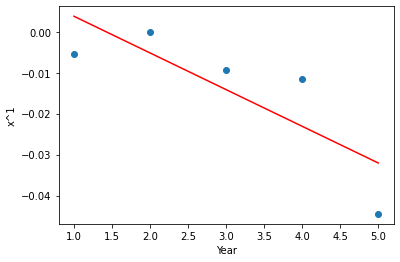

[[22.21616135642185, -0.02895456056654671], [23.0964088991329, -0.026744818564294264], [29.678666882185848, -0.04130903446234441], [27.149414758458093, -0.030797014508935086], [30.7166869764714, 0.005795828597515672], [35.25803971311268, -0.041000233457083674]]
24TNaPhraLan


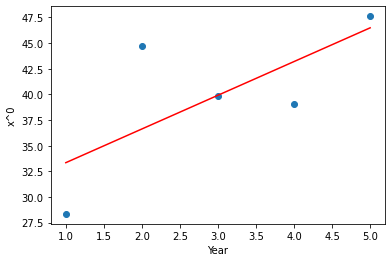

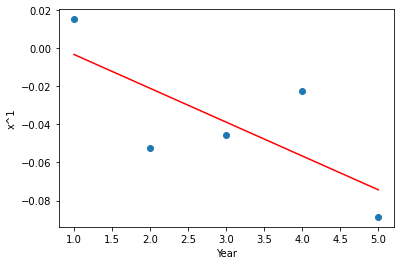

[[22.21616135642185, -0.02895456056654671], [23.0964088991329, -0.026744818564294264], [29.678666882185848, -0.04130903446234441], [27.149414758458093, -0.030797014508935086], [30.7166869764714, 0.005795828597515672], [35.25803971311268, -0.041000233457083674], [49.77849824253147, -0.09215233034703843]]
26TNaMueang


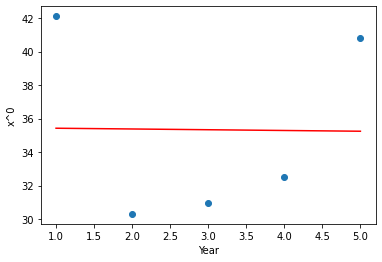

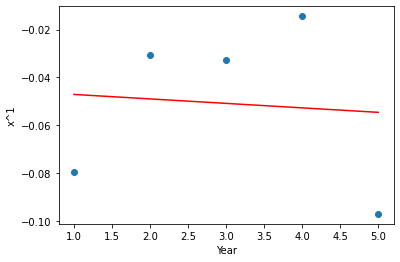

[[22.21616135642185, -0.02895456056654671], [23.0964088991329, -0.026744818564294264], [29.678666882185848, -0.04130903446234441], [27.149414758458093, -0.030797014508935086], [30.7166869764714, 0.005795828597515672], [35.25803971311268, -0.041000233457083674], [49.77849824253147, -0.09215233034703843], [35.19702658371644, -0.05650295954040601]]
27TMahachai


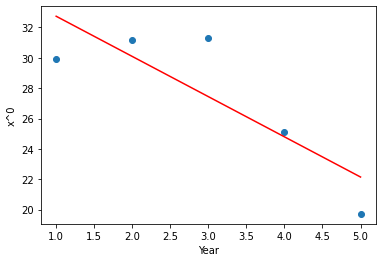

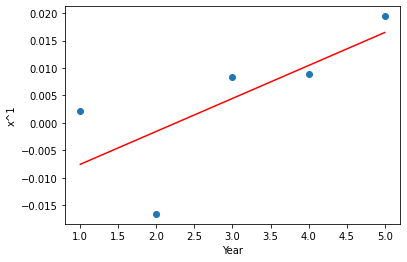

[[22.21616135642185, -0.02895456056654671], [23.0964088991329, -0.026744818564294264], [29.678666882185848, -0.04130903446234441], [27.149414758458093, -0.030797014508935086], [30.7166869764714, 0.005795828597515672], [35.25803971311268, -0.041000233457083674], [49.77849824253147, -0.09215233034703843], [35.19702658371644, -0.05650295954040601], [19.500484087362604, 0.022444026699034024]]
30TThaPradu


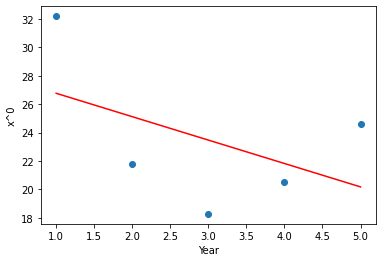

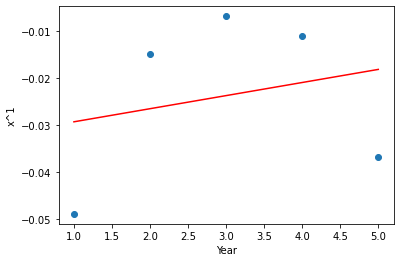

[[22.21616135642185, -0.02895456056654671], [23.0964088991329, -0.026744818564294264], [29.678666882185848, -0.04130903446234441], [27.149414758458093, -0.030797014508935086], [30.7166869764714, 0.005795828597515672], [35.25803971311268, -0.041000233457083674], [49.77849824253147, -0.09215233034703843], [35.19702658371644, -0.05650295954040601], [19.500484087362604, 0.022444026699034024], [18.53254039545304, -0.015423730591480243]]
32TThungSukhla


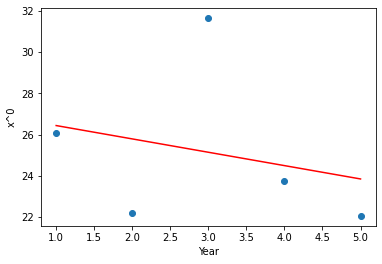

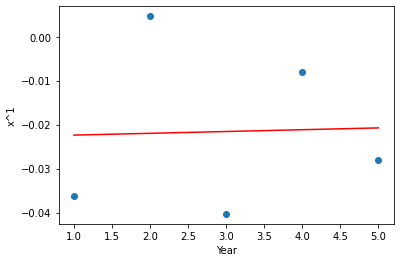

[[22.21616135642185, -0.02895456056654671], [23.0964088991329, -0.026744818564294264], [29.678666882185848, -0.04130903446234441], [27.149414758458093, -0.030797014508935086], [30.7166869764714, 0.005795828597515672], [35.25803971311268, -0.041000233457083674], [49.77849824253147, -0.09215233034703843], [35.19702658371644, -0.05650295954040601], [19.500484087362604, 0.022444026699034024], [18.53254039545304, -0.015423730591480243], [23.196372713296135, -0.020340169947531322]]
35TChangPhueak


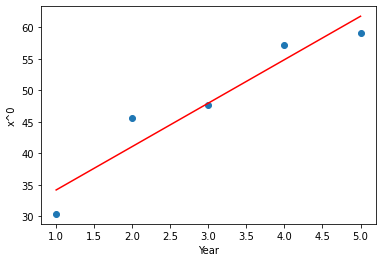

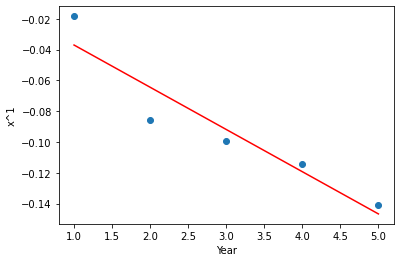

[[22.21616135642185, -0.02895456056654671], [23.0964088991329, -0.026744818564294264], [29.678666882185848, -0.04130903446234441], [27.149414758458093, -0.030797014508935086], [30.7166869764714, 0.005795828597515672], [35.25803971311268, -0.041000233457083674], [49.77849824253147, -0.09215233034703843], [35.19702658371644, -0.05650295954040601], [19.500484087362604, 0.022444026699034024], [18.53254039545304, -0.015423730591480243], [23.196372713296135, -0.020340169947531322], [68.65404283567318, -0.17413414355674744]]
36TSiPhum


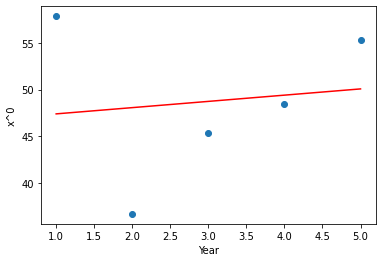

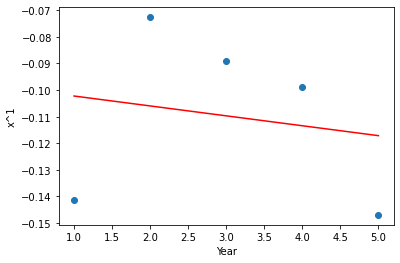

[[22.21616135642185, -0.02895456056654671], [23.0964088991329, -0.026744818564294264], [29.678666882185848, -0.04130903446234441], [27.149414758458093, -0.030797014508935086], [30.7166869764714, 0.005795828597515672], [35.25803971311268, -0.041000233457083674], [49.77849824253147, -0.09215233034703843], [35.19702658371644, -0.05650295954040601], [19.500484087362604, 0.022444026699034024], [18.53254039545304, -0.015423730591480243], [23.196372713296135, -0.020340169947531322], [68.65404283567318, -0.17413414355674744], [50.73637257345544, -0.12086907164737318]]
40TMaeMo


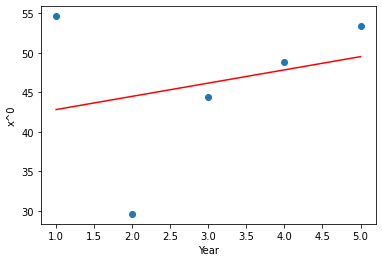

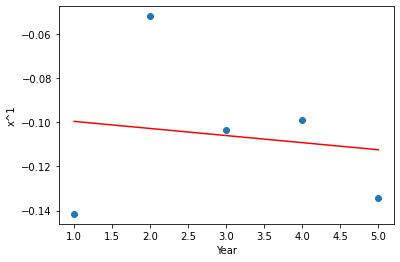

[[22.21616135642185, -0.02895456056654671], [23.0964088991329, -0.026744818564294264], [29.678666882185848, -0.04130903446234441], [27.149414758458093, -0.030797014508935086], [30.7166869764714, 0.005795828597515672], [35.25803971311268, -0.041000233457083674], [49.77849824253147, -0.09215233034703843], [35.19702658371644, -0.05650295954040601], [19.500484087362604, 0.022444026699034024], [18.53254039545304, -0.015423730591480243], [23.196372713296135, -0.020340169947531322], [68.65404283567318, -0.17413414355674744], [50.73637257345544, -0.12086907164737318], [51.18699012642421, -0.11566520754700532]]
46TNaiMueang


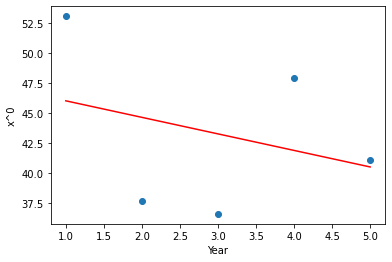

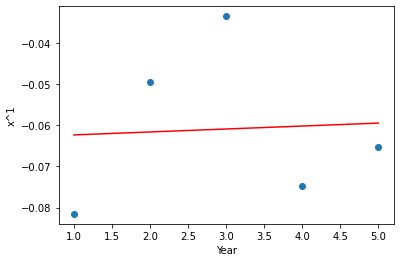

[[22.21616135642185, -0.02895456056654671], [23.0964088991329, -0.026744818564294264], [29.678666882185848, -0.04130903446234441], [27.149414758458093, -0.030797014508935086], [30.7166869764714, 0.005795828597515672], [35.25803971311268, -0.041000233457083674], [49.77849824253147, -0.09215233034703843], [35.19702658371644, -0.05650295954040601], [19.500484087362604, 0.022444026699034024], [18.53254039545304, -0.015423730591480243], [23.196372713296135, -0.020340169947531322], [68.65404283567318, -0.17413414355674744], [50.73637257345544, -0.12086907164737318], [51.18699012642421, -0.11566520754700532], [39.14264228996544, -0.05878481234011686]]
44THatYai


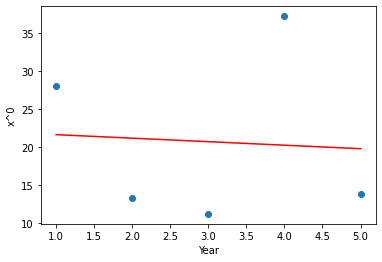

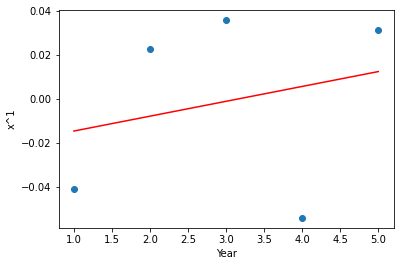

[[22.21616135642185, -0.02895456056654671], [23.0964088991329, -0.026744818564294264], [29.678666882185848, -0.04130903446234441], [27.149414758458093, -0.030797014508935086], [30.7166869764714, 0.005795828597515672], [35.25803971311268, -0.041000233457083674], [49.77849824253147, -0.09215233034703843], [35.19702658371644, -0.05650295954040601], [19.500484087362604, 0.022444026699034024], [18.53254039545304, -0.015423730591480243], [23.196372713296135, -0.020340169947531322], [68.65404283567318, -0.17413414355674744], [50.73637257345544, -0.12086907164737318], [51.18699012642421, -0.11566520754700532], [39.14264228996544, -0.05878481234011686], [19.31149166426059, 0.01924591929706203]]
75THuaiKon


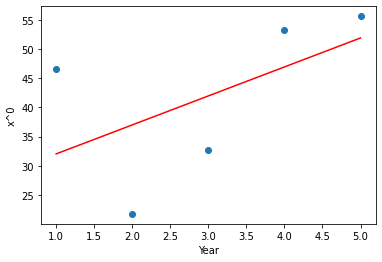

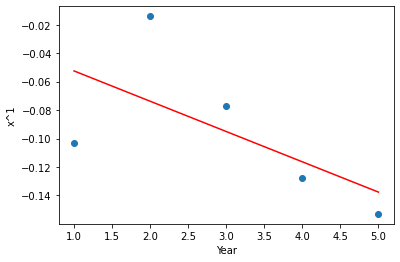

[[22.21616135642185, -0.02895456056654671], [23.0964088991329, -0.026744818564294264], [29.678666882185848, -0.04130903446234441], [27.149414758458093, -0.030797014508935086], [30.7166869764714, 0.005795828597515672], [35.25803971311268, -0.041000233457083674], [49.77849824253147, -0.09215233034703843], [35.19702658371644, -0.05650295954040601], [19.500484087362604, 0.022444026699034024], [18.53254039545304, -0.015423730591480243], [23.196372713296135, -0.020340169947531322], [68.65404283567318, -0.17413414355674744], [50.73637257345544, -0.12086907164737318], [51.18699012642421, -0.11566520754700532], [39.14264228996544, -0.05878481234011686], [19.31149166426059, 0.01924591929706203], [56.87140148346301, -0.15897889150294686]]
76TMaePa


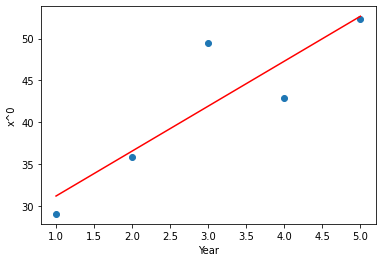

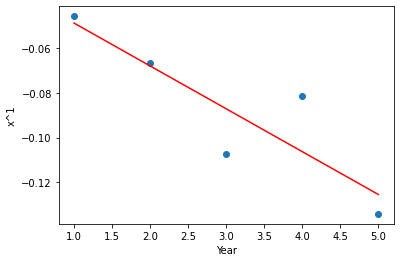

[[22.21616135642185, -0.02895456056654671], [23.0964088991329, -0.026744818564294264], [29.678666882185848, -0.04130903446234441], [27.149414758458093, -0.030797014508935086], [30.7166869764714, 0.005795828597515672], [35.25803971311268, -0.041000233457083674], [49.77849824253147, -0.09215233034703843], [35.19702658371644, -0.05650295954040601], [19.500484087362604, 0.022444026699034024], [18.53254039545304, -0.015423730591480243], [23.196372713296135, -0.020340169947531322], [68.65404283567318, -0.17413414355674744], [50.73637257345544, -0.12086907164737318], [51.18699012642421, -0.11566520754700532], [39.14264228996544, -0.05878481234011686], [19.31149166426059, 0.01924591929706203], [56.87140148346301, -0.15897889150294686], [58.04458473482501, -0.1447331086060387]]
77TThaTum


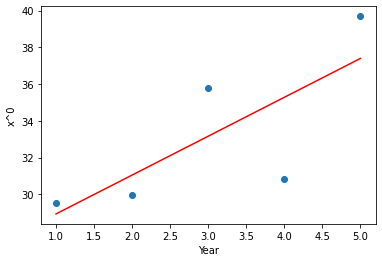

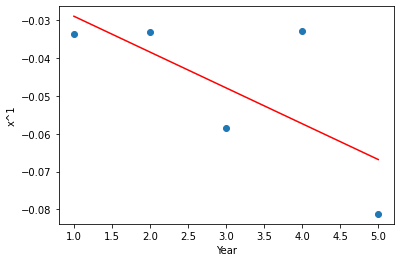

[[22.21616135642185, -0.02895456056654671], [23.0964088991329, -0.026744818564294264], [29.678666882185848, -0.04130903446234441], [27.149414758458093, -0.030797014508935086], [30.7166869764714, 0.005795828597515672], [35.25803971311268, -0.041000233457083674], [49.77849824253147, -0.09215233034703843], [35.19702658371644, -0.05650295954040601], [19.500484087362604, 0.022444026699034024], [18.53254039545304, -0.015423730591480243], [23.196372713296135, -0.020340169947531322], [68.65404283567318, -0.17413414355674744], [50.73637257345544, -0.12086907164737318], [51.18699012642421, -0.11566520754700532], [39.14264228996544, -0.05878481234011686], [19.31149166426059, 0.01924591929706203], [56.87140148346301, -0.15897889150294686], [58.04458473482501, -0.1447331086060387], [39.50892381067544, -0.07629514265973415]]


In [ ]:
futureEq = []
xCal = [1,2,3,4,5]
for ii in range(0,19):
  print(list_s[ii])
  tempFutureEq = []
  for i in range(0,2):
    model = numpy.poly1d(numpy.polyfit(xCal,theta[ii][i],1))
    line = numpy.linspace(1,len(xCal),50)
    plt.scatter(xCal,theta[ii][i])
    plt.plot(line , model(line), "r-")
    plt.xlabel('Year')
    plt.ylabel('x^'+str(i))
    plt.show()
    tempFutureEq.append(model(6))
  futureEq.append(tempFutureEq)
  print(futureEq)

05TฺBangNa
2021


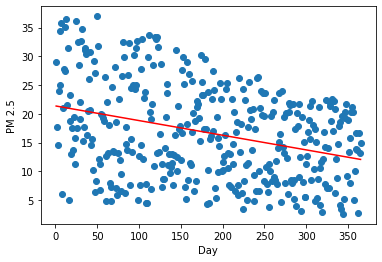

[0.8659148374997919, 0.8459597472918495, 0.8017950535176152, 0.8195470385288798, 0.7740441973373346]
59TPhayaThai
2021


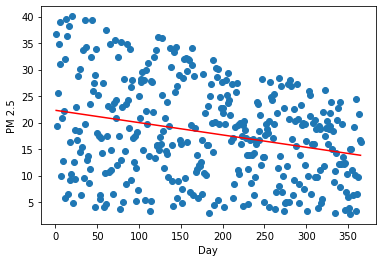

[0.8837576640587312, 0.8687774525110229, 0.8636002608092229, 0.8475178751031147, 0.7454894358221236]
61TPhlabphla
2021


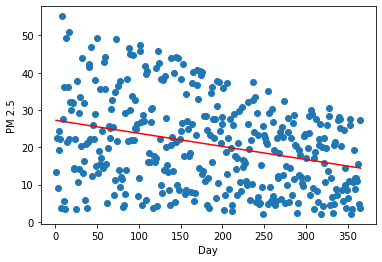

[0.8878535546903764, 0.874597223489994, 0.8470574651578077, 0.8745913771219516, 0.7814345049446255]
52TBangYiRuea
2021


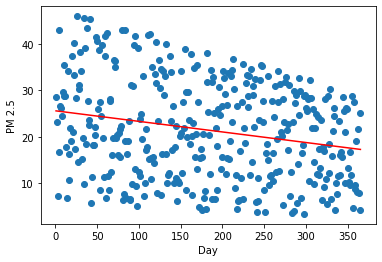

[0.8963728507399276, 0.8744040164461436, 0.8402641133254308, 0.8633483841838829, 0.7877814876899877]
54TDinDaeng
2021


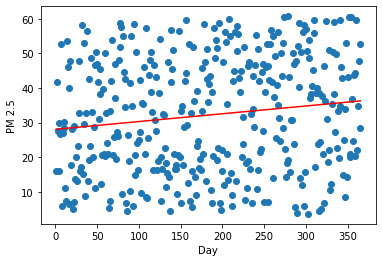

[0.9523700143864169, 0.9528500405625839, 0.9083413125966607, 0.9137038507876446, 0.7958344351206631]
08TSongKhanong
2021


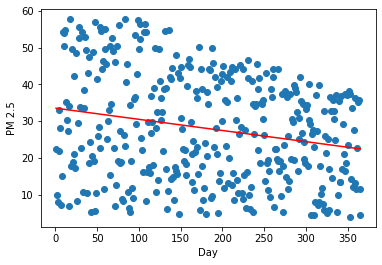

[0.8862858223539097, 0.8805453792056448, 0.8868995991781239, 0.8786757291517254, 0.7689262632759765]
24TNaPhraLan
2021


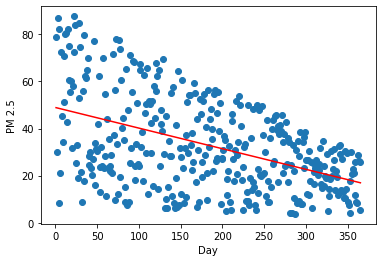

[0.9105267046559222, 0.8996298358895106, 0.9069495968503904, 0.8851758500721157, 0.8138888551018717]
26TNaMueang
2021


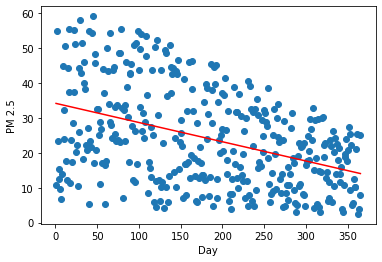

[0.8502054339396726, 0.8507140181391362, 0.851545236170309, 0.819572513233137, 0.7346031746873041]
27TMahachai
2021


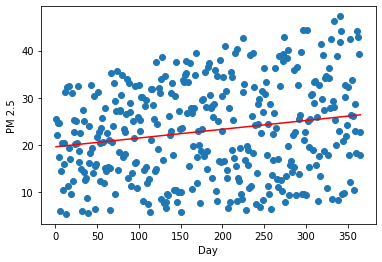

[0.8326556723209004, 0.827175116486378, 0.7735930668426112, 0.7776857399007754, 0.7293217429520767]
30TThaPradu
2021


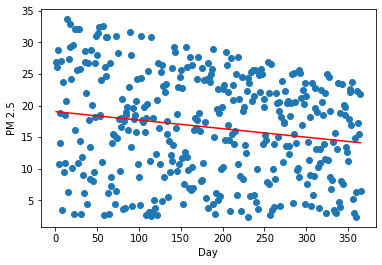

[0.8598780923165351, 0.831415468236152, 0.8661720527198922, 0.841524586730277, 0.7650205143753853]
32TThungSukhla
2021


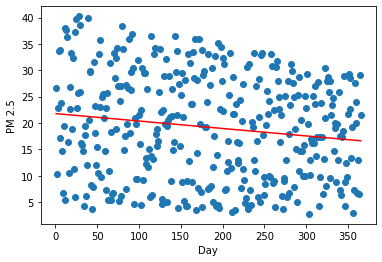

[0.8501441624914846, 0.8562698656564746, 0.859252969624578, 0.8279486297428674, 0.739916399310508]
35TChangPhueak
2021


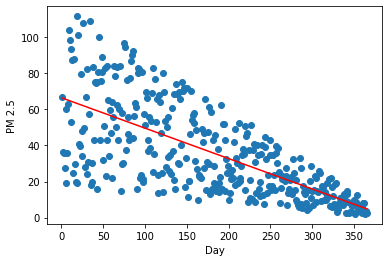

[0.8643125926158557, 0.9150555353521663, 0.8592304710543894, 0.8719386517052268, 0.7812335748466948]
36TSiPhum
2021


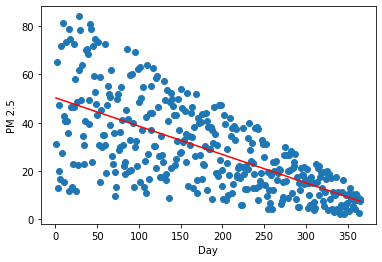

[0.8778732126029803, 0.8885277373147226, 0.8369744770008469, 0.8656731193909258, 0.7341473713212063]
40TMaeMo
2021


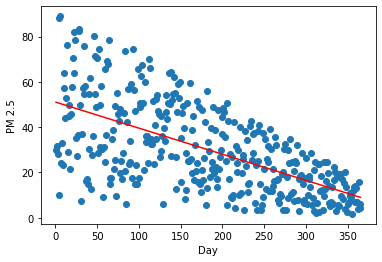

[0.8485289682131135, 0.8879079718529614, 0.8872522222051319, 0.8575912754561508, 0.778317434075419]
46TNaiMueang
2021


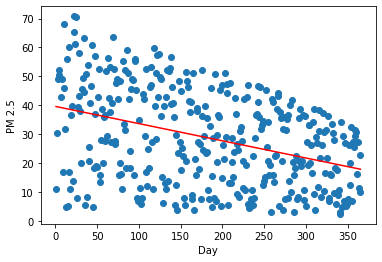

[0.8930038550513789, 0.8961117756103005, 0.9080011027397481, 0.913139063716439, 0.8196806841052278]
44THatYai
2021


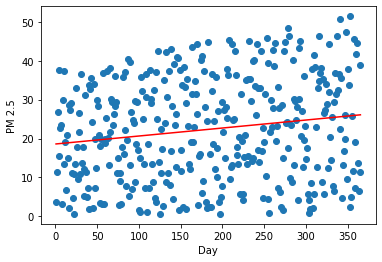

[0.8345182339513934, 0.896635669186381, 0.812029307771801, 0.8661019451184142, 0.8374805870548406]
75THuaiKon
2021


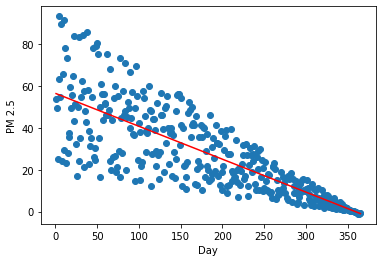

[0.7309796686963974, 0.78849791846157, 0.819018479778774, 0.833625398546339, 0.6606767475404385]
76TMaePa
2021


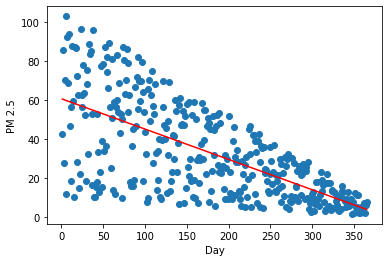

[0.8261385328214097, 0.890353295329861, 0.8880371690821046, 0.9286395440727095, 0.7901916595840401]
77TThaTum
2021


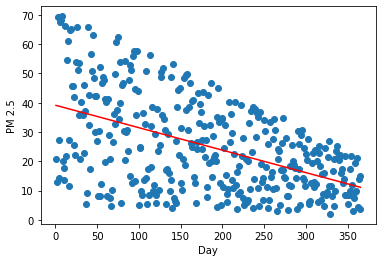

[0.8707403644845426, 0.8907603477172796, 0.8761724725296757, 0.8850715583300346, 0.7903167025121317]


In [ ]:
import random
for ii in range(0,19):
  print(list_s[ii])
  futureX = []
  future = []
  for i in range (1,366):
    futureX.append(i)
    temp = 0
    for j in range(0,2):
      temp += futureEq[ii][j]*pow(i,j)
    future.append(random.uniform(temp-(temp*(newCoSim[ii])),temp+(temp*(newCoSim[ii]))))
    #if i < 125 or i > 270:
    #  future.append(random.uniform(temp-15,temp+15))
    #elif i < 175 or i > 230:
    #  future.append(random.uniform(temp-7,temp+7))
    #else:
    #  future.append(random.uniform(temp-3,temp+3))
  model = numpy.poly1d(numpy.polyfit(futureX,future,1))
  line = numpy.linspace(1,len(futureX),100)
  plt.scatter(futureX,future)
  plt.plot(line , model(line), "r-")
  plt.xlabel('Day')
  plt.ylabel('PM 2.5')
  print(2021)
  plt.show()
  for i in range(0,365):
    arr[ii][i].append(future[i])
  coSimF = dat.getCoSim(arr[ii],5)
  print(coSimF)

In [ ]:
for i in range(len(yG[0][0])):
  #print(i)
  print(yG[0][0][i])
#print(' '.join(str(e) for e in range(1,367)))
#print(' '.join(str(e) for e in yG[0][0]))

30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
14
9
11
12
17
16
16
15
15
19
20
24
25
30
30
13
16
13
18
25
23
19
21
25
16
16
11
11
12
12
13
15
24
17
15
19
20
16
20
16
22
19
22
26
18
16
14
20
25
26
21
22
20
23
19
22
28
26
21
29
23
25
26
23
22
16
22
17
14
19
20
20
15
14
16
17
13
18
24
21
21
22
23
19
26
21
16
18
20
28
25
27
25
29
17
20
17
18
16
16
16
23
22
21
32
24
22
20
20
22
31
35
44
41
40
27
31
47
30
16
22
25
25
34
35
30
26
33
30
25
23
22
27
30
43
66
75
62
28
32
30
26
32
25
36
32
39
36
35
34
45
51
46
48
27
36
29
21
26
32